In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# data=pd.read_csv("/content/drive/MyDrive/Data Science Project/Datasets/train.csv")
data=pd.read_csv("preprocessing_stage1.csv", index_col=0)
print(data.head(10))
print("\nRows and columns in dataset are: ",data.shape)

   MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   
5          50       RL         85.0    14115   Pave      IR1         Lvl   
6          20       RL         75.0    10084   Pave      Reg         Lvl   
7          60       RL         69.0    10382   Pave      IR1         Lvl   
8          50       RM         51.0     6120   Pave      Reg         Lvl   
9         190       RL         50.0     7420   Pave      Reg         Lvl   

  Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl  ...             0         0           0   
1    AllPub

In [ ]:
#checking column types-> numerical or categorical
numerical_columns=data.select_dtypes(include=['int64','float64']).columns
categorical_columns=data.select_dtypes(include=['object','category']).columns
print("\nNumerical columns are: ",numerical_columns)
print("\nCategorical columns are: ",categorical_columns)


Numerical columns are:  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Categorical columns are:  Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType

In [ ]:
data[categorical_columns].shape

(1460, 37)

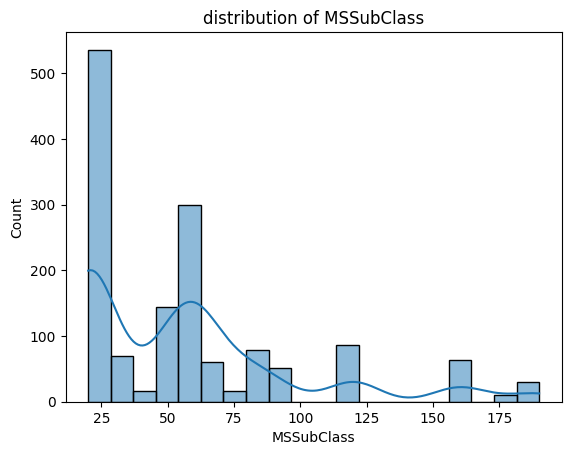

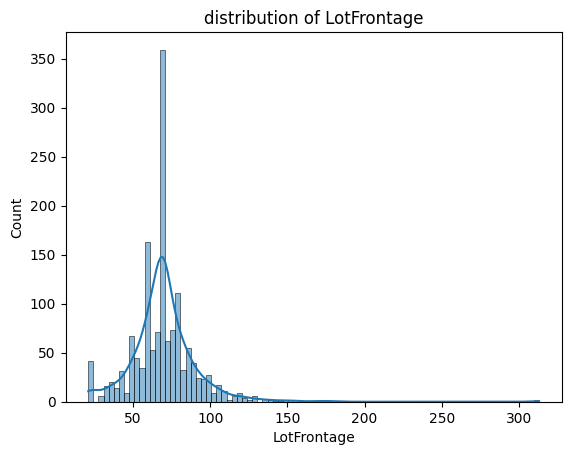

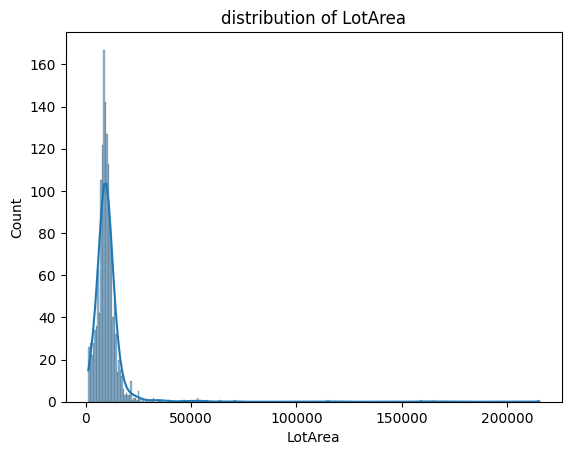

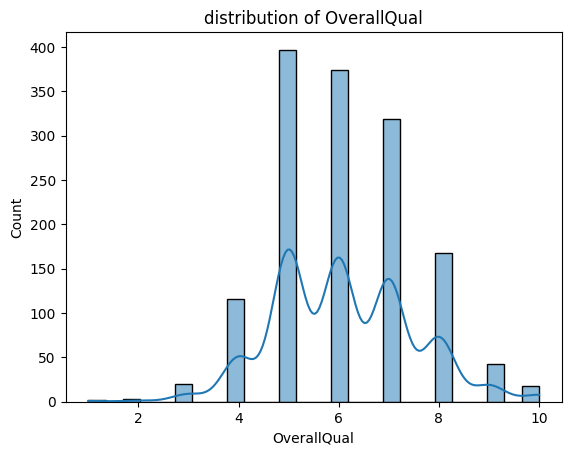

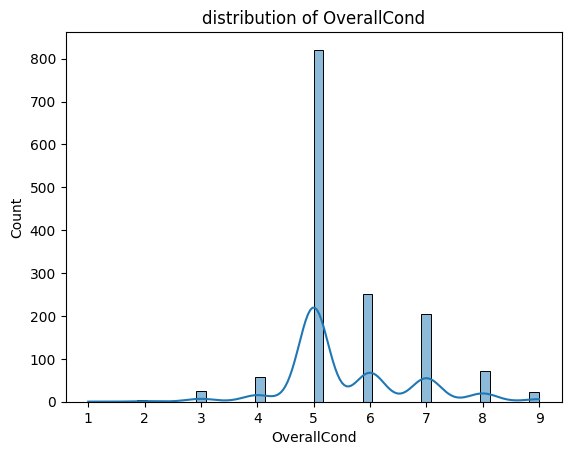

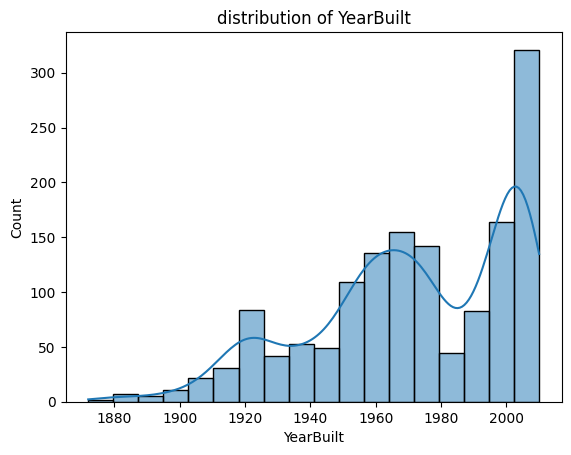

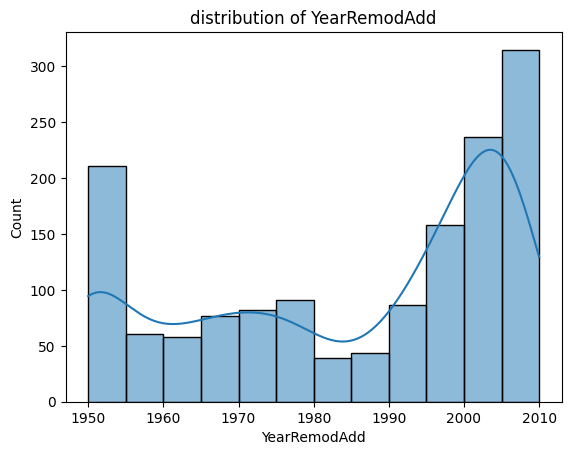

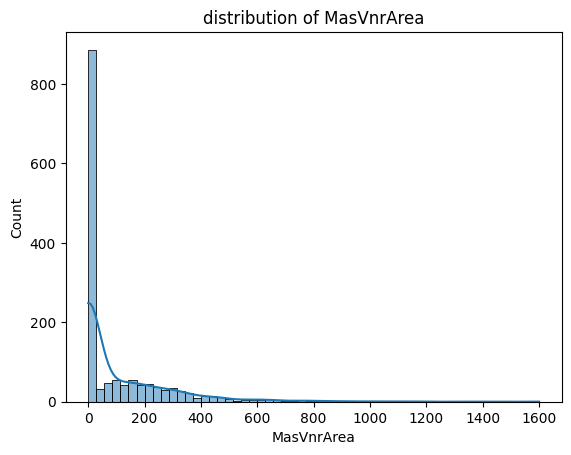

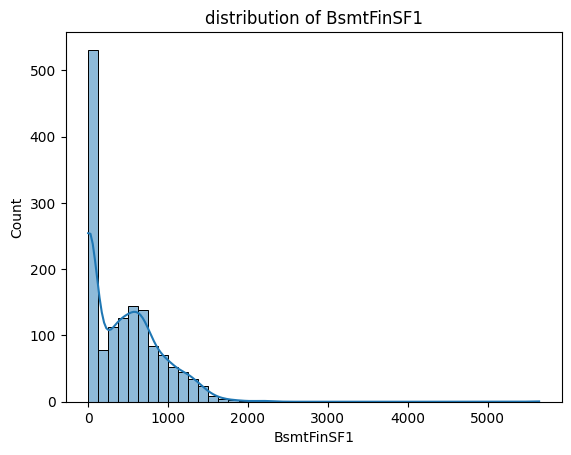

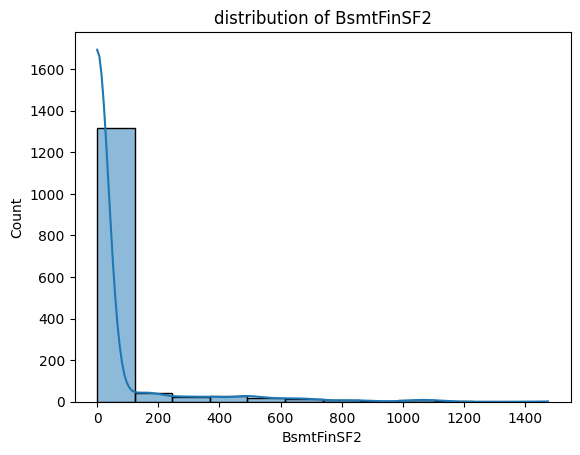

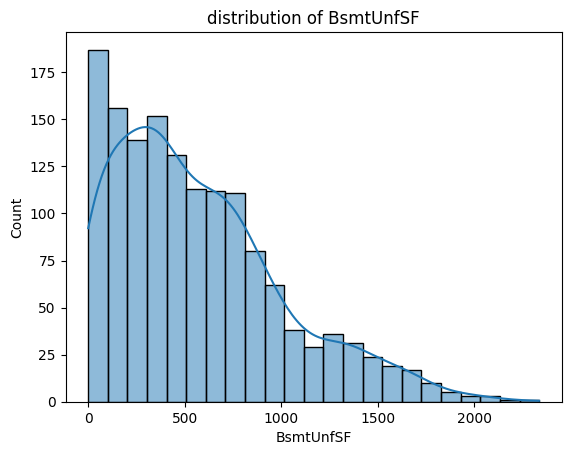

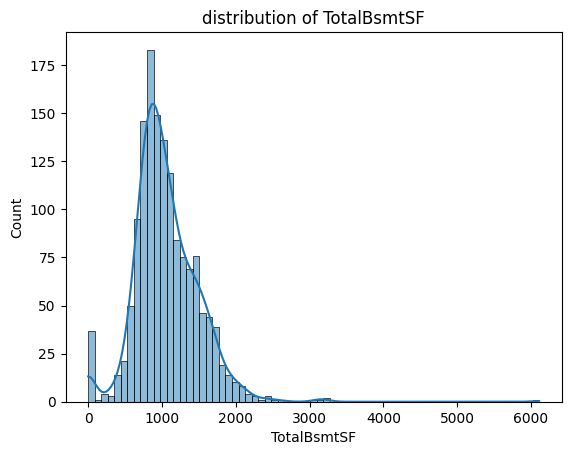

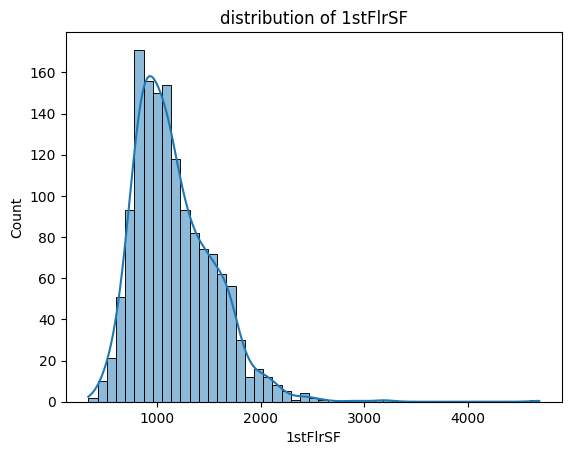

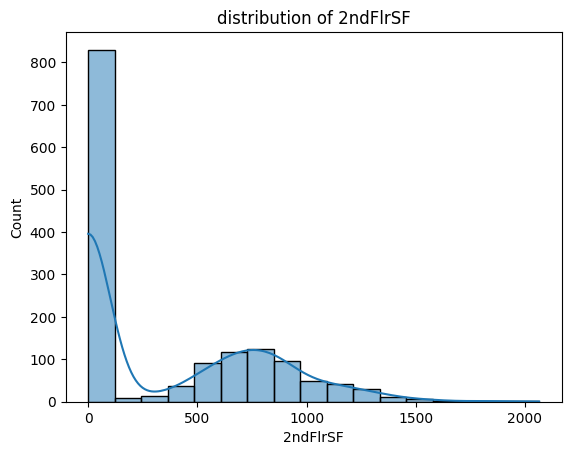

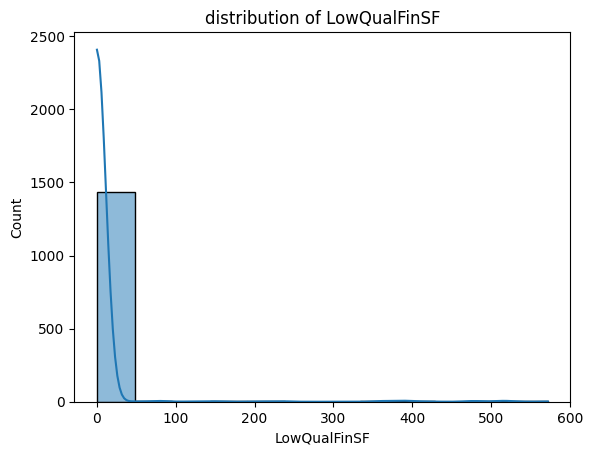

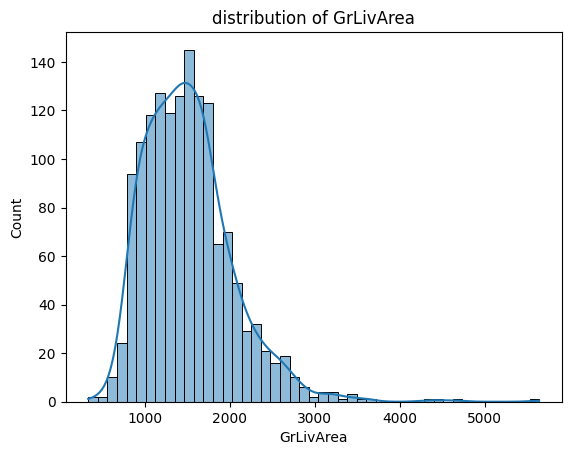

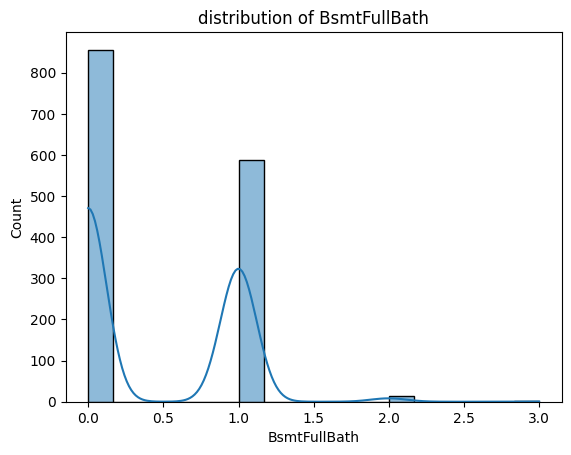

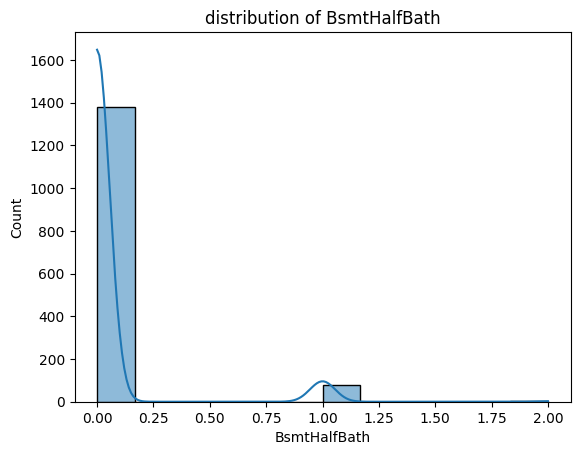

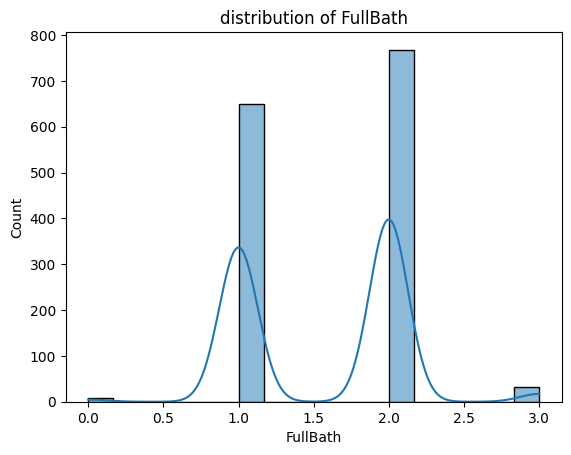

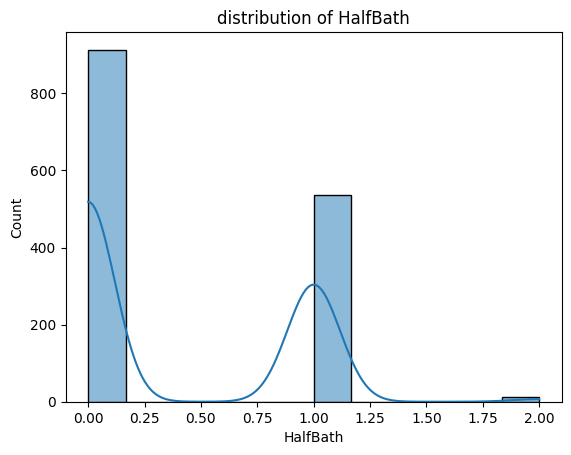

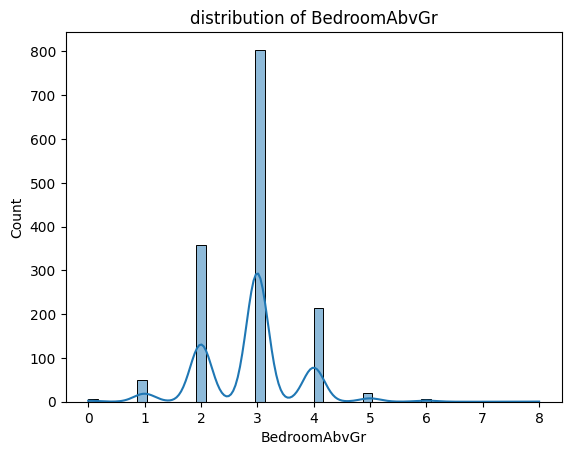

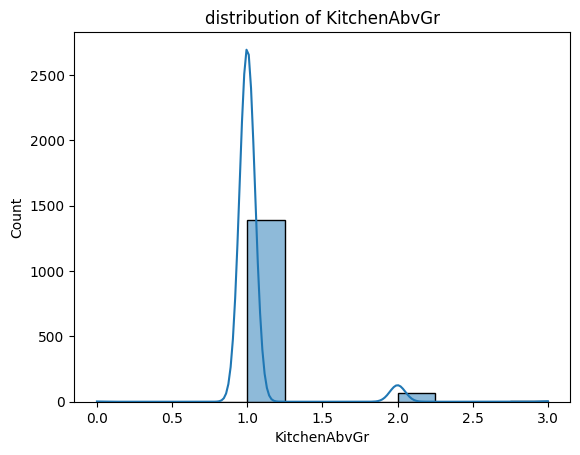

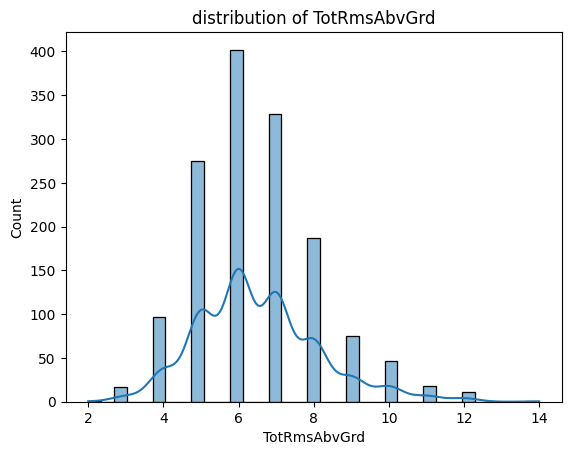

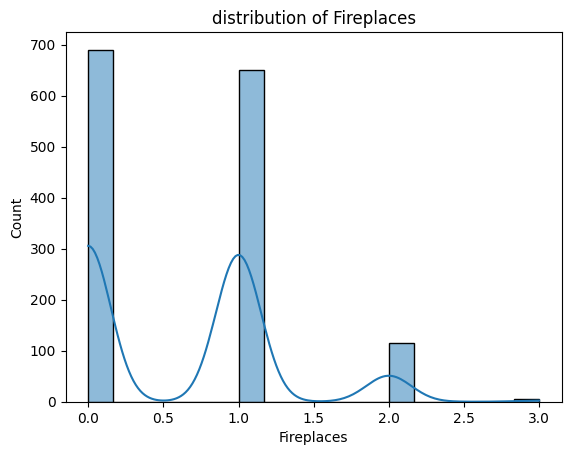

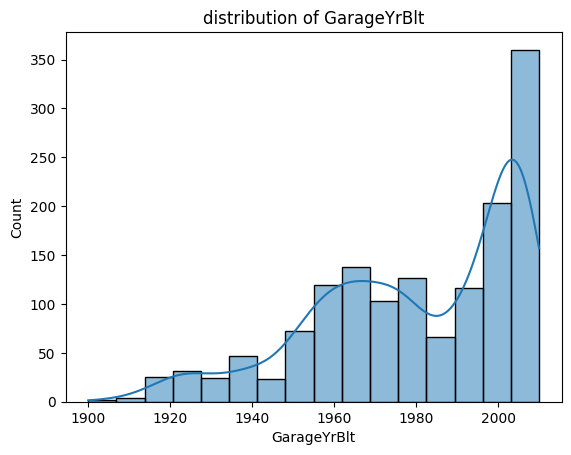

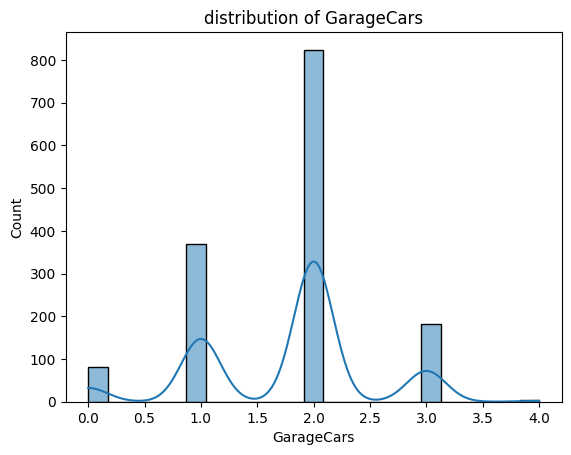

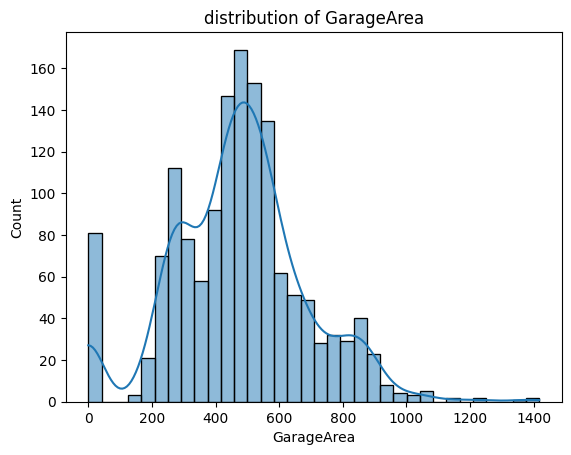

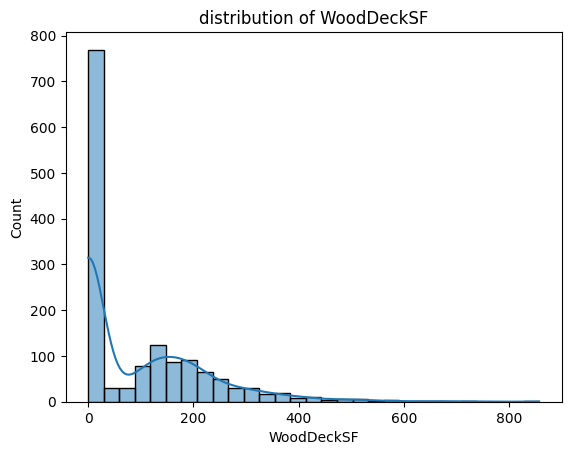

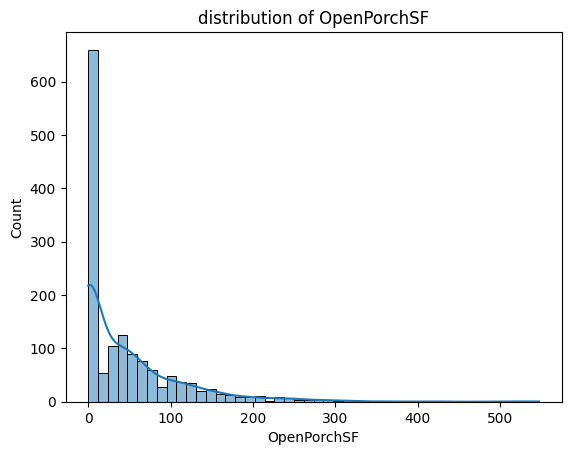

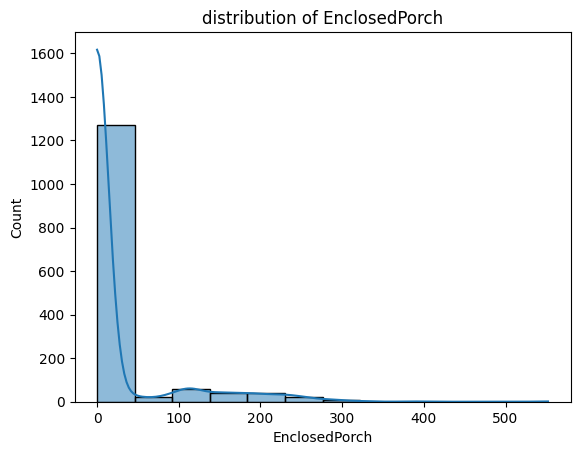

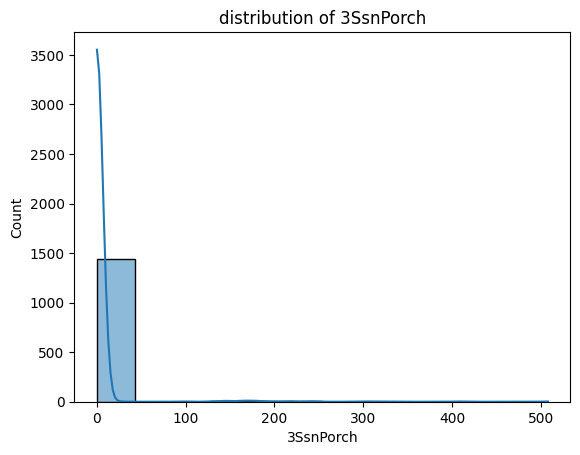

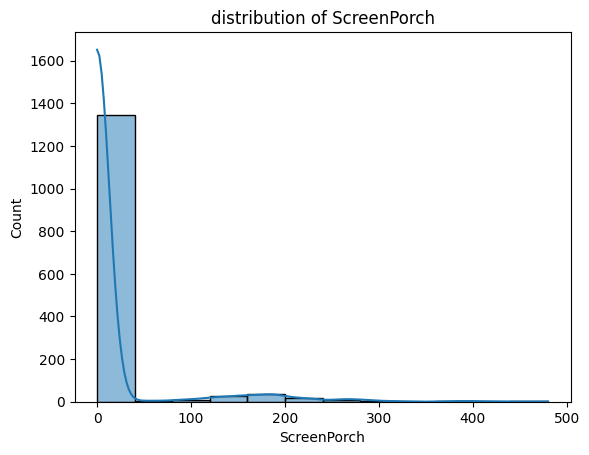

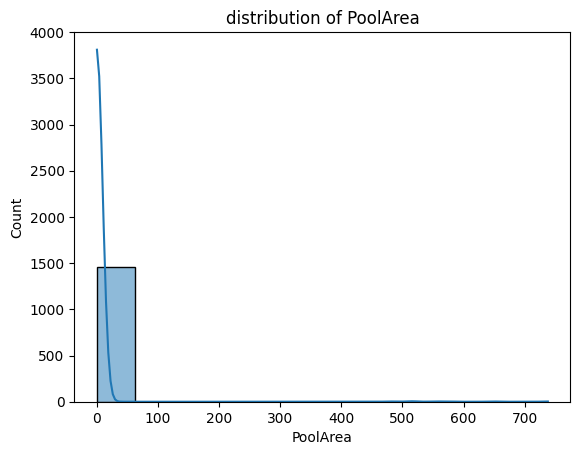

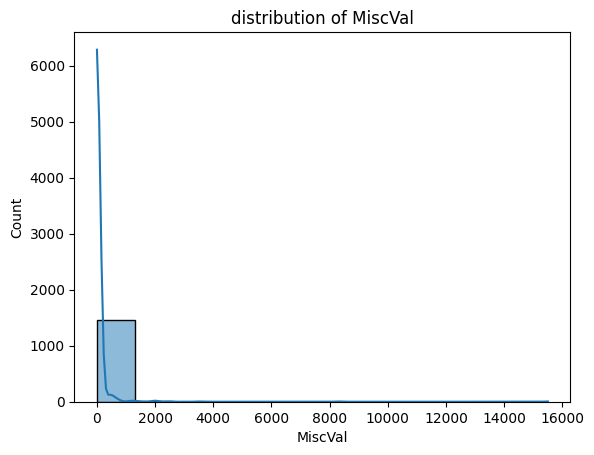

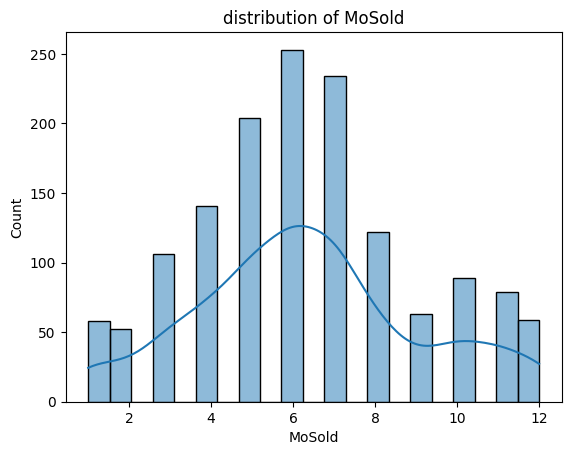

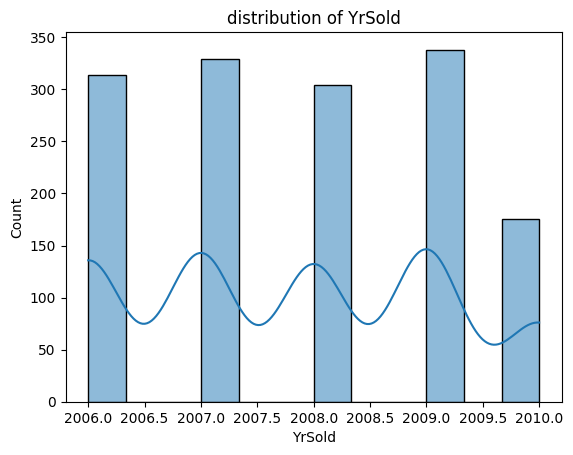

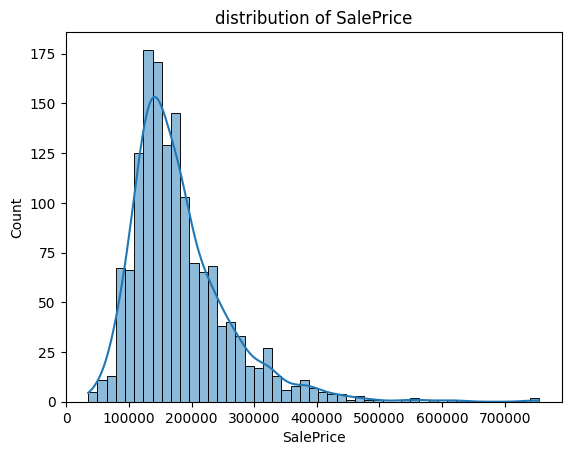

In [ ]:
for col in numerical_columns:
  sns.histplot(data[col], kde=True)
  plt.title(f"distribution of {col}")
  plt.show()

Summary:
-Looking at the histogram for the YrSold column, we can see the distribution of the number of houses sold in each year from 2006 to 2010. It appears that the number of sales is relatively consistent across these years, with perhaps a slight decrease in 2009 and 2010 compared to the earlier years.

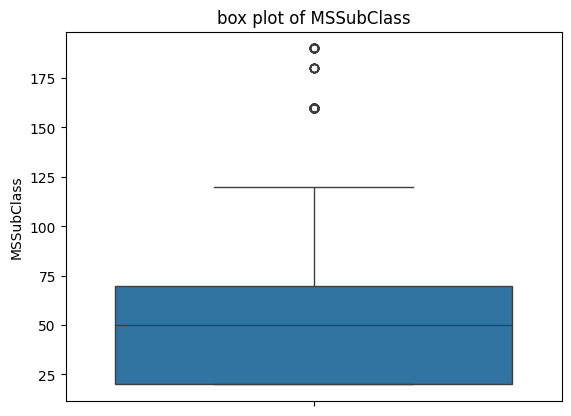

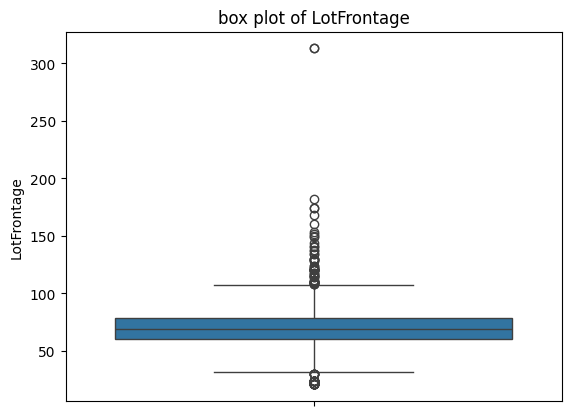

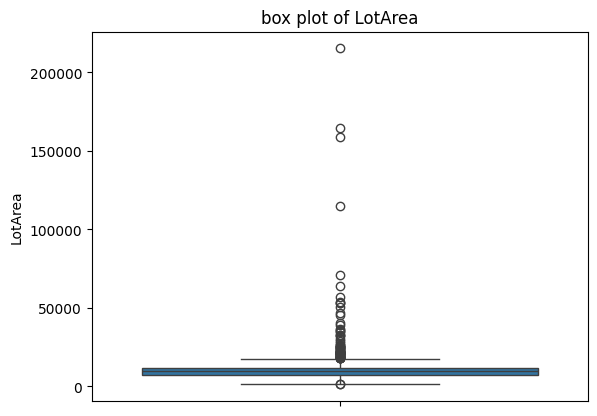

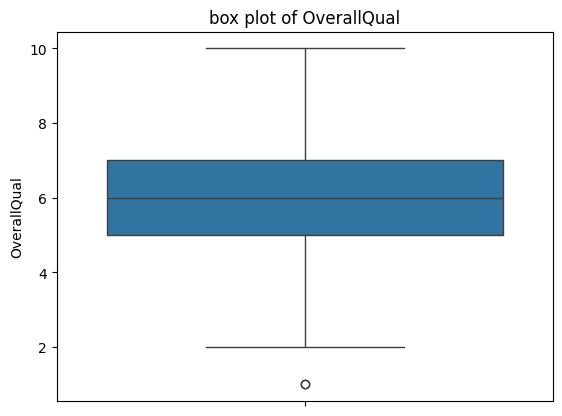

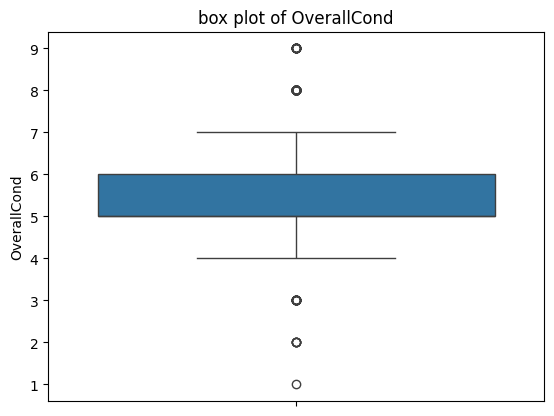

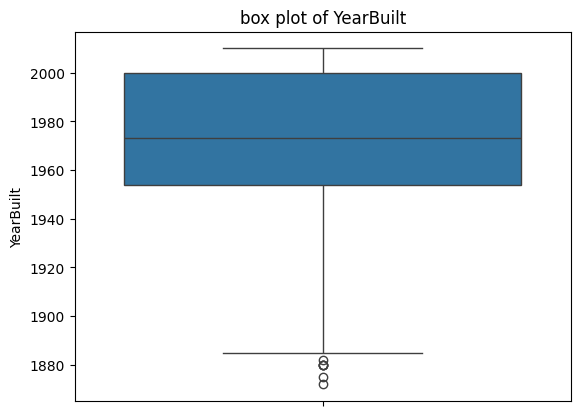

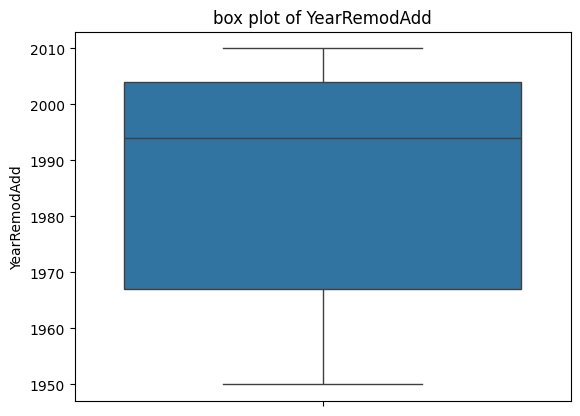

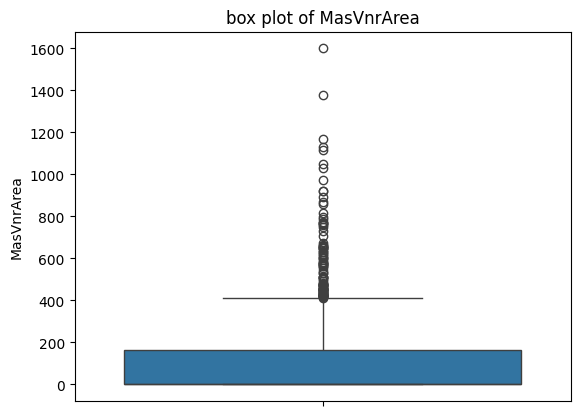

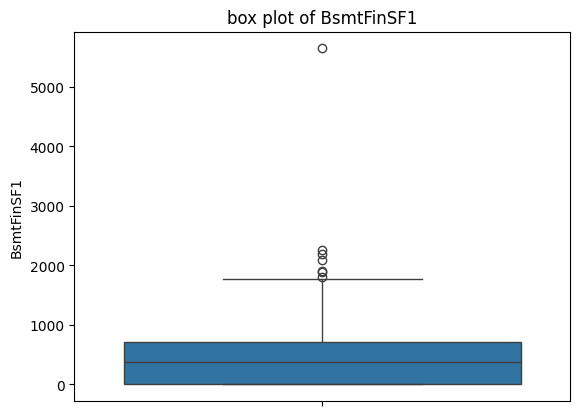

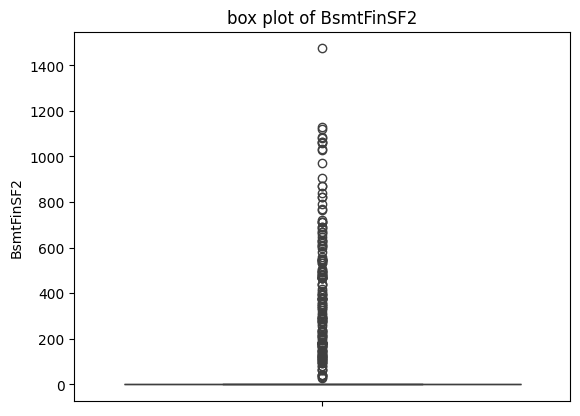

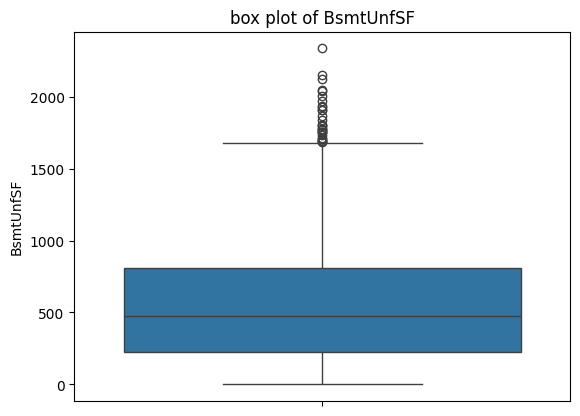

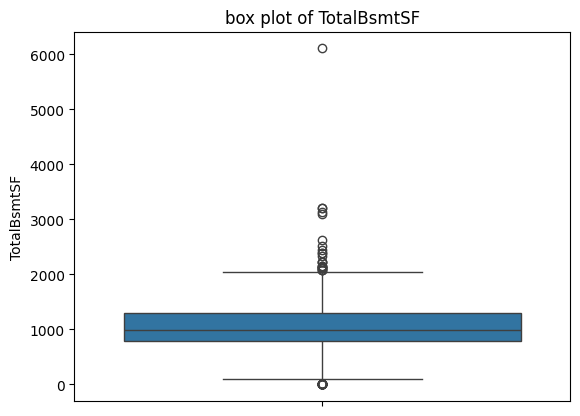

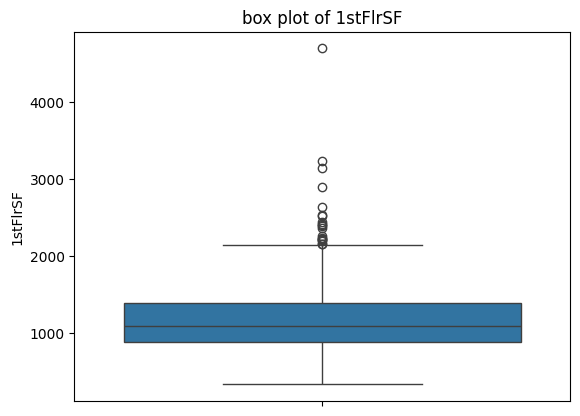

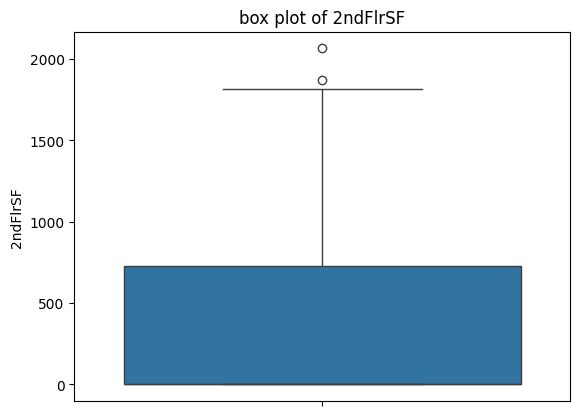

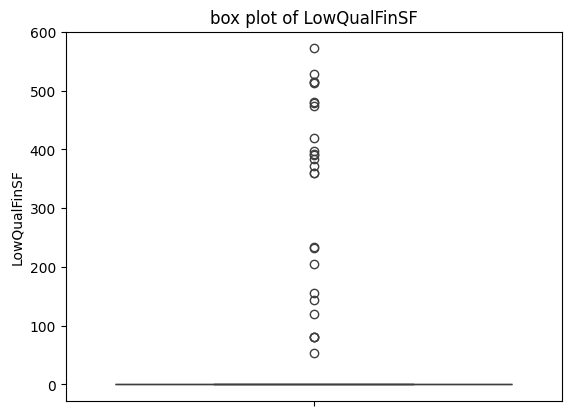

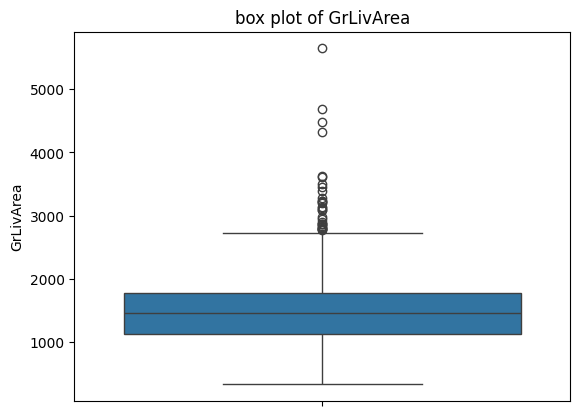

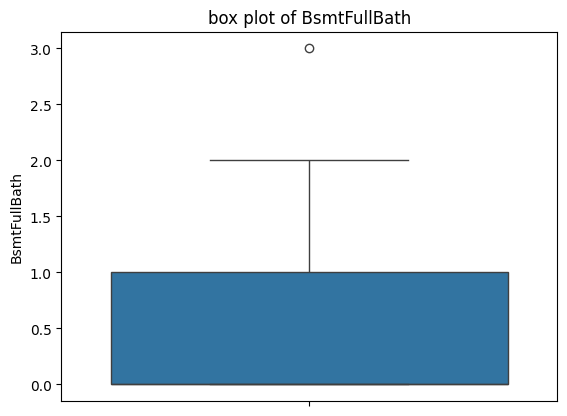

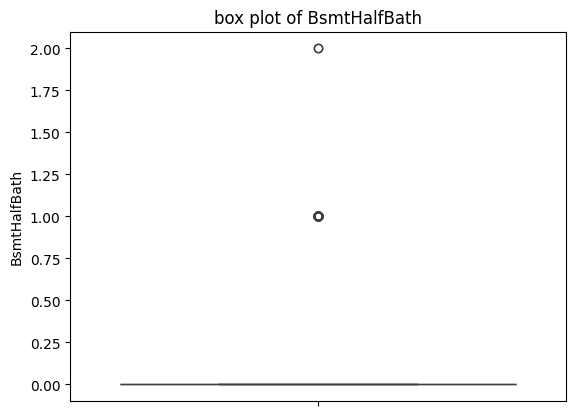

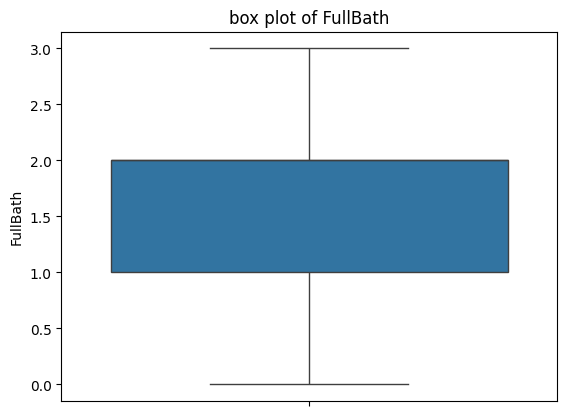

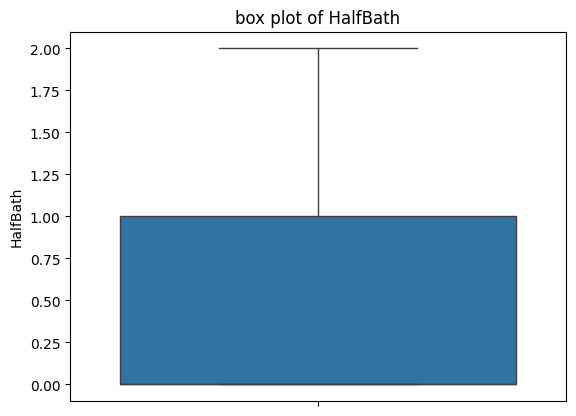

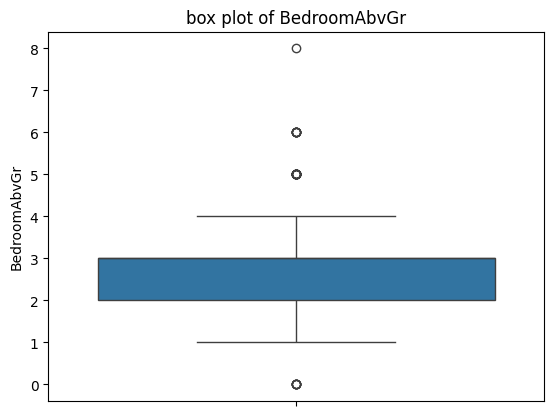

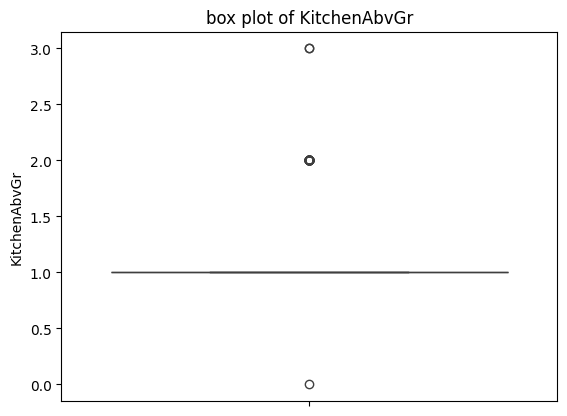

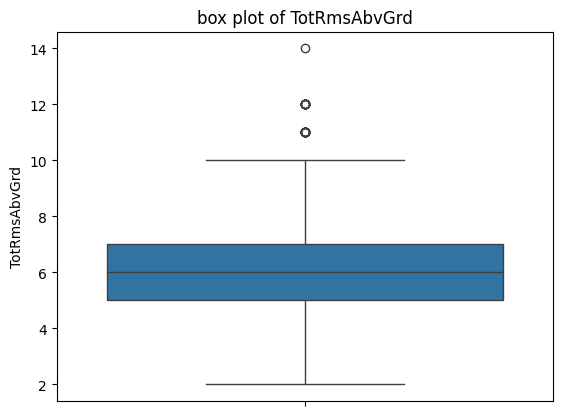

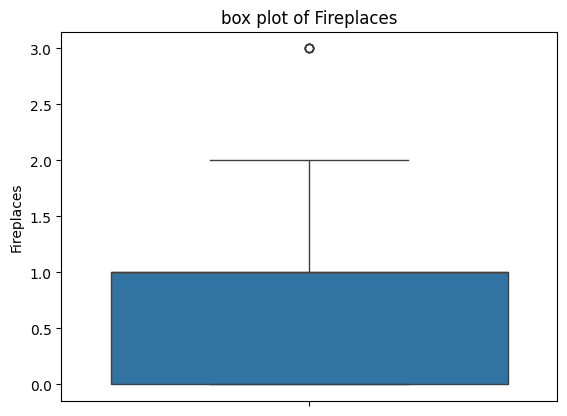

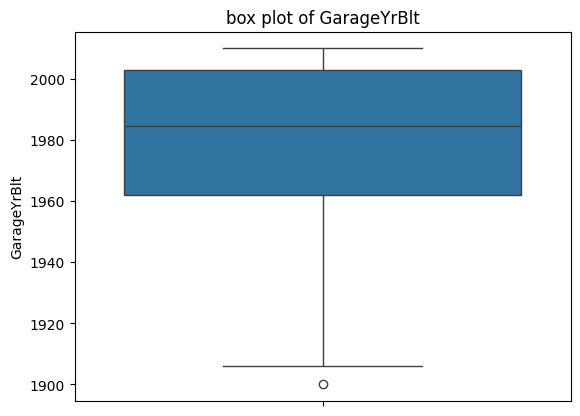

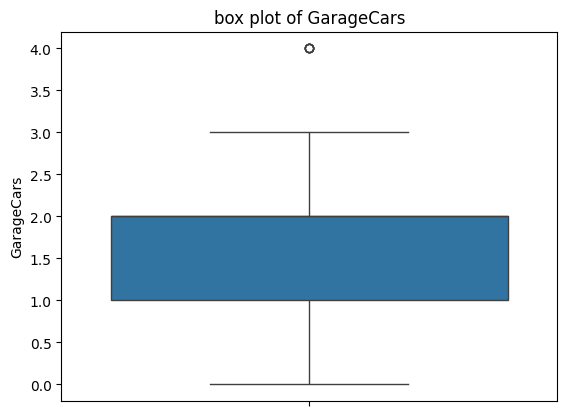

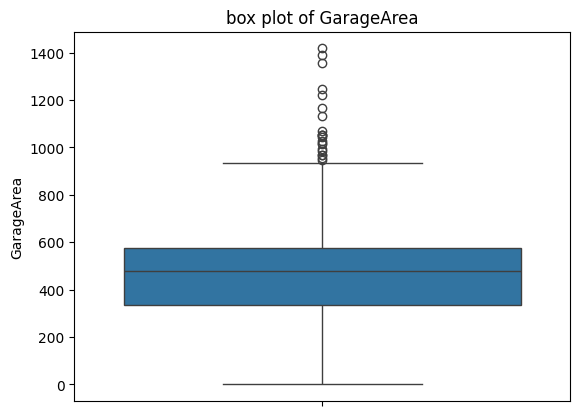

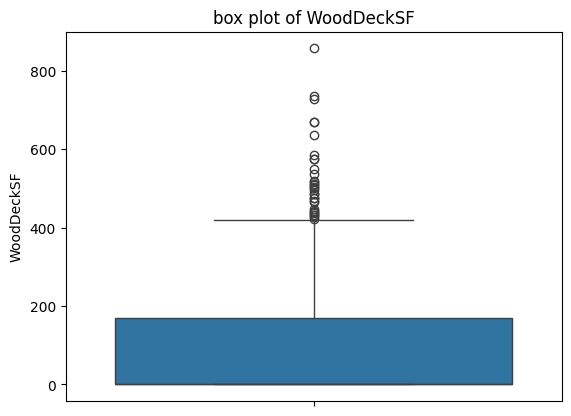

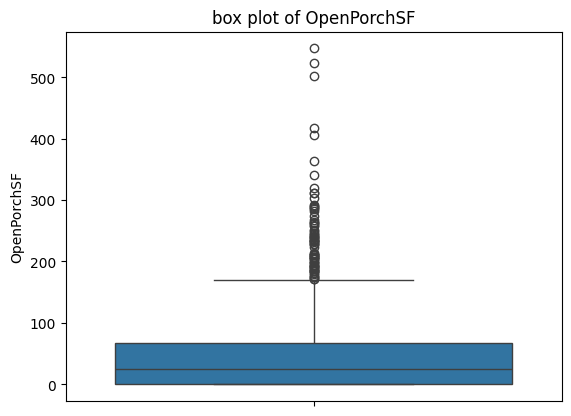

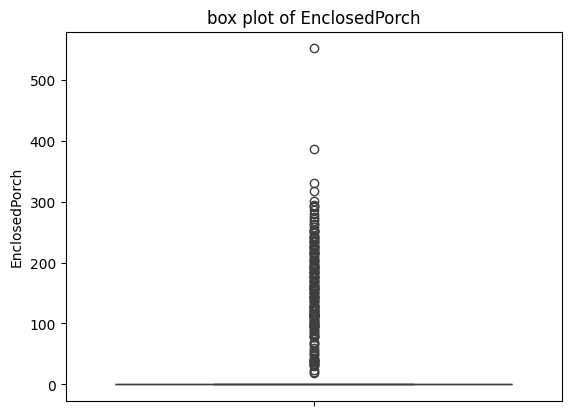

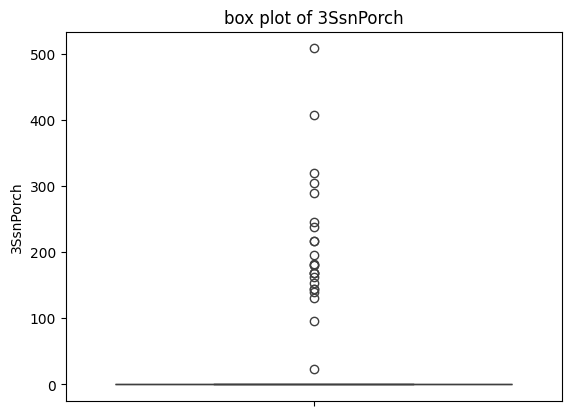

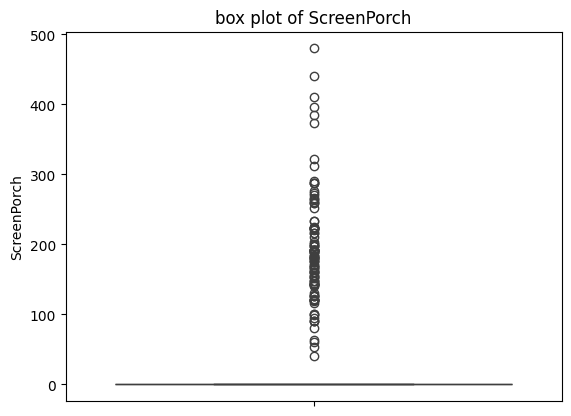

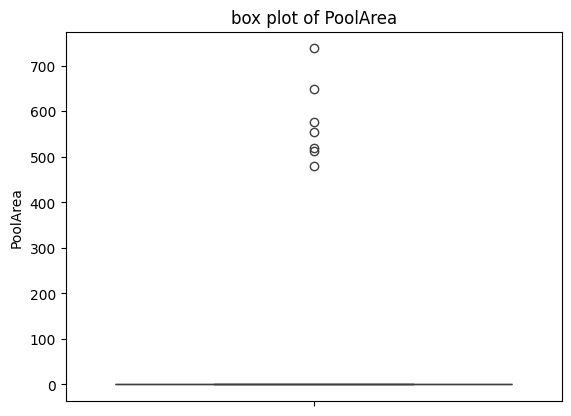

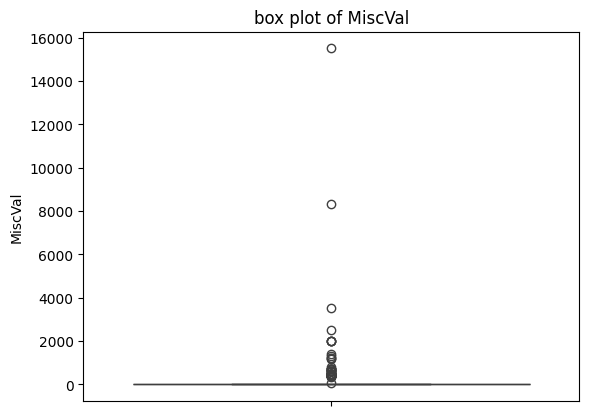

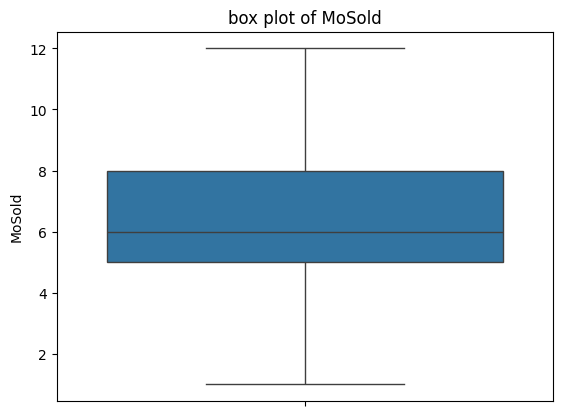

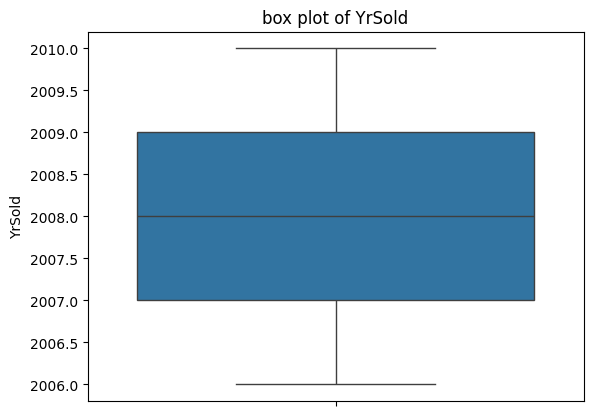

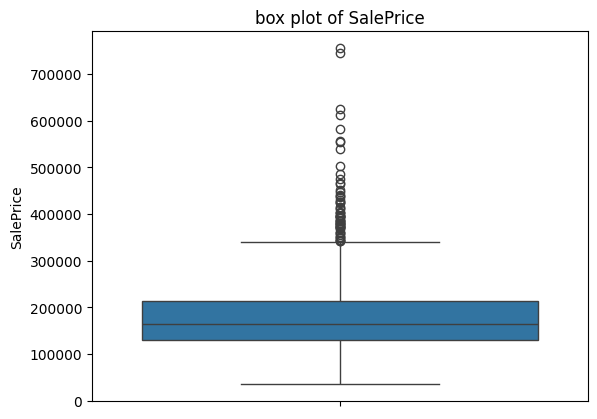

In [ ]:
# plotting box plots
for col in numerical_columns:
  sns.boxplot(data[col])
  plt.title(f"box plot of {col}")
  plt.show()

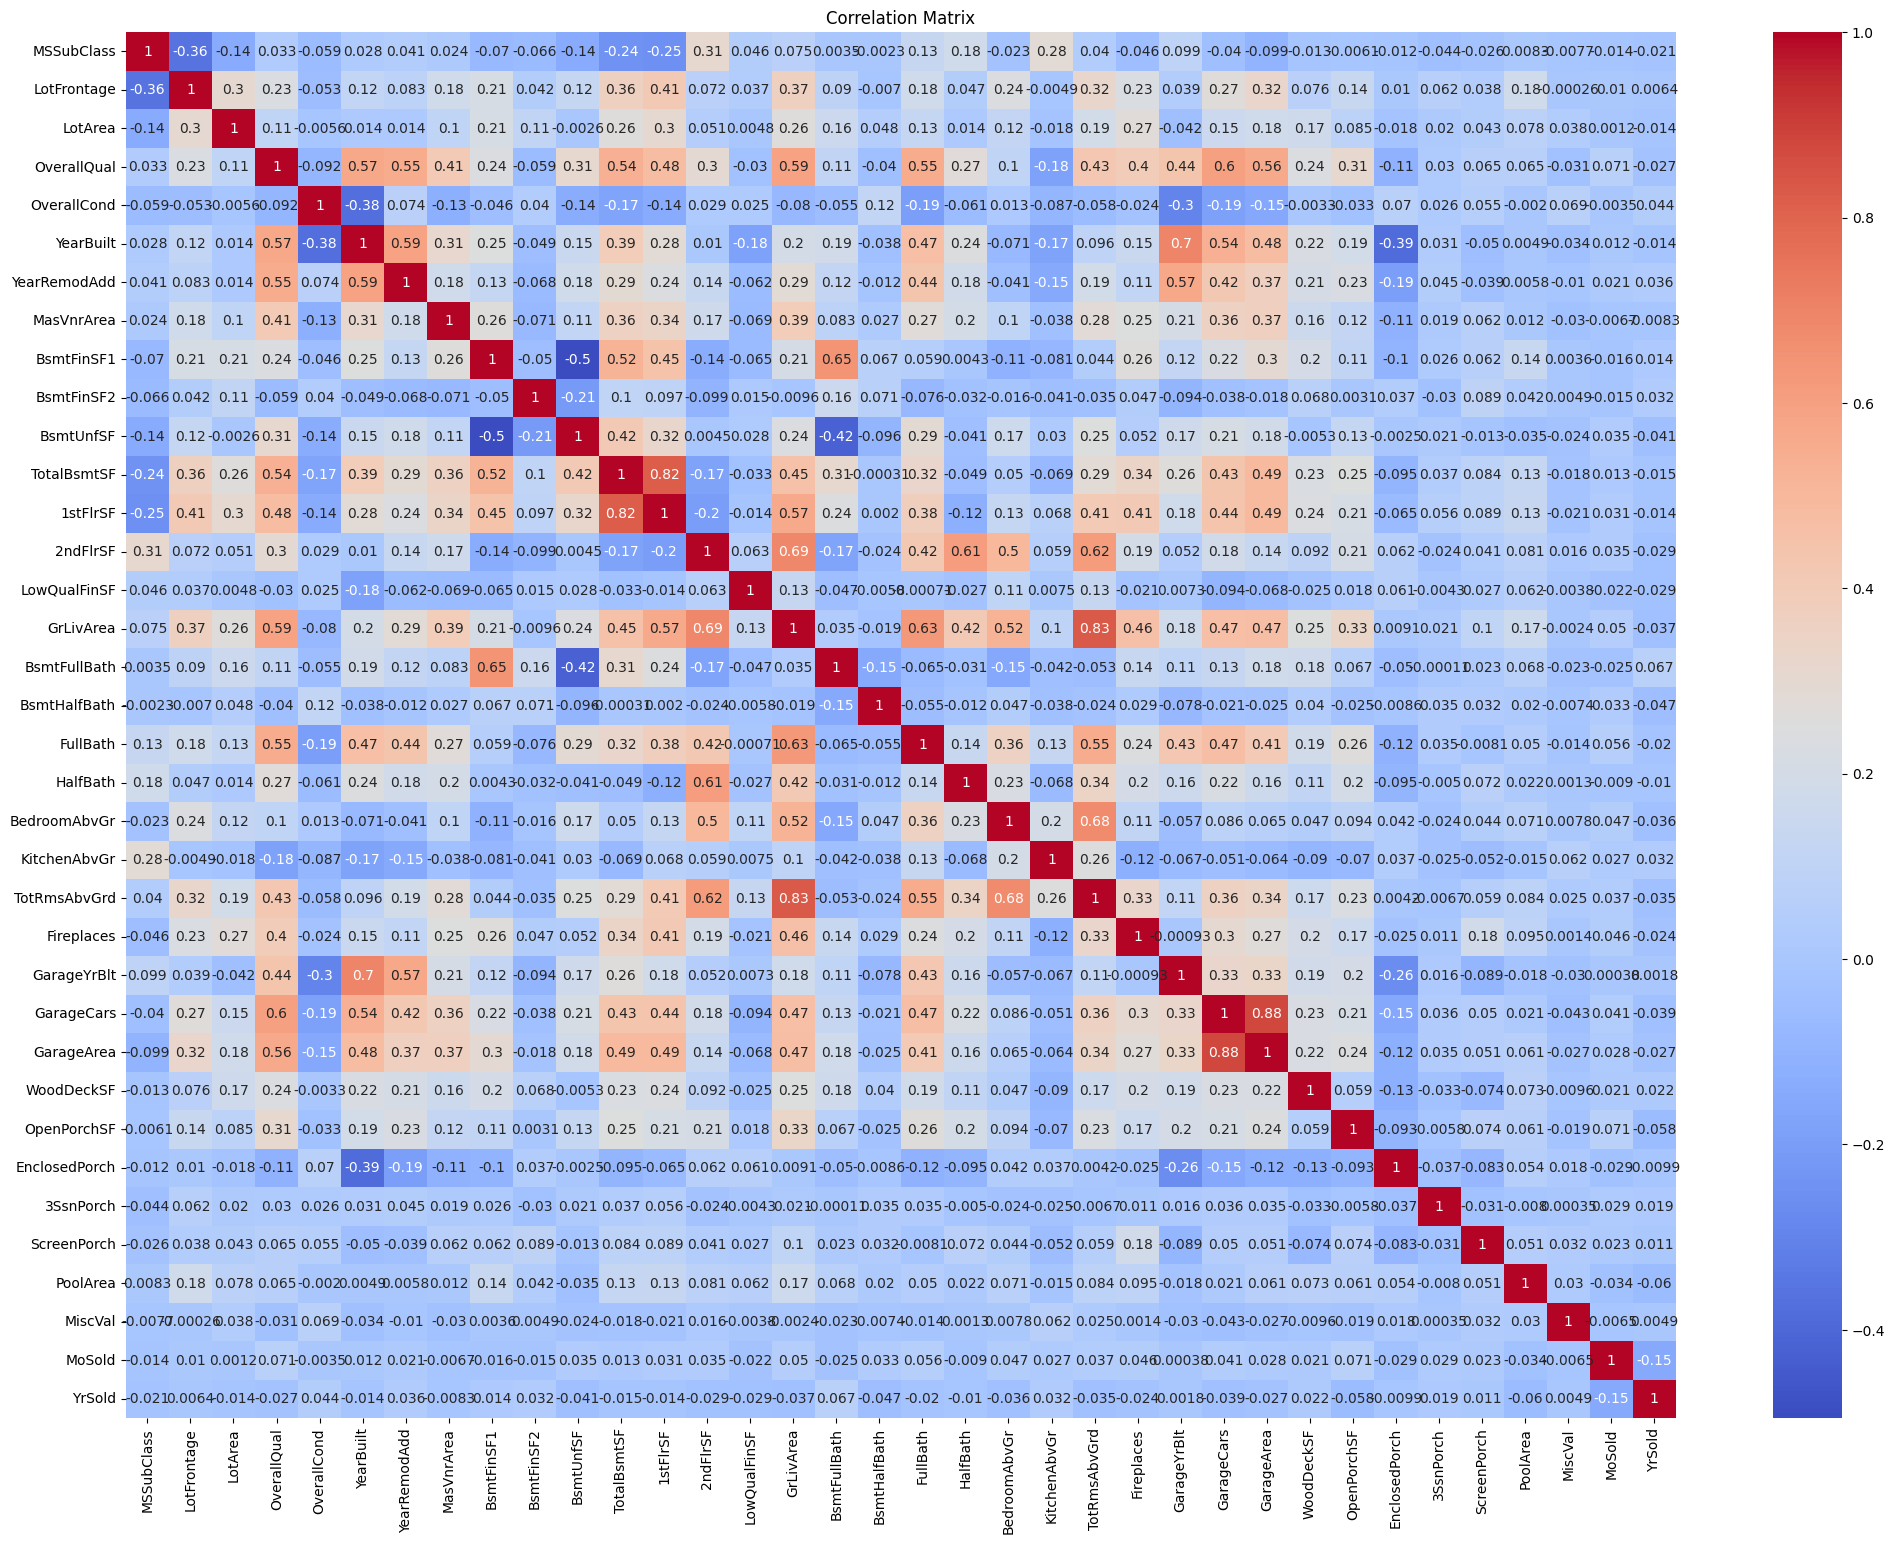

In [ ]:
data_without_target=data[numerical_columns].drop(columns=['SalePrice'],axis=1)
plt.figure(figsize=(25,18))
correlation_matrix=data_without_target.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
high_correlation_pairs = correlation_matrix.unstack().sort_values(kind="quicksort", ascending=False).drop_duplicates()
high_correlation_pairs = high_correlation_pairs[(high_correlation_pairs > 0.7) & (high_correlation_pairs < 1.0)]

print("Column pairs with correlation value above 0.7:")
for (col1, col2), correlation_value in high_correlation_pairs.items():
    print(f"{col1} and {col2}: {correlation_value:.2f}")
print(data.shape)

Column pairs with correlation value above 0.7:
GarageCars and GarageArea: 0.88
TotRmsAbvGrd and GrLivArea: 0.83
1stFlrSF and TotalBsmtSF: 0.82
YearBuilt and GarageYrBlt: 0.70
(1460, 74)


In [ ]:
print(data.shape)
data = data.drop(['YearBuilt','1stFlrSF','TotRmsAbvGrd','GarageArea'],axis=1)
numerical_columns=data.select_dtypes(include=['int64','float64']).columns
print(data.shape)

(1460, 74)
(1460, 70)


/tmp/ipython-input-1048532053.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette="viridis", order=correlation_with_target.sort_values(ascending=False).index)


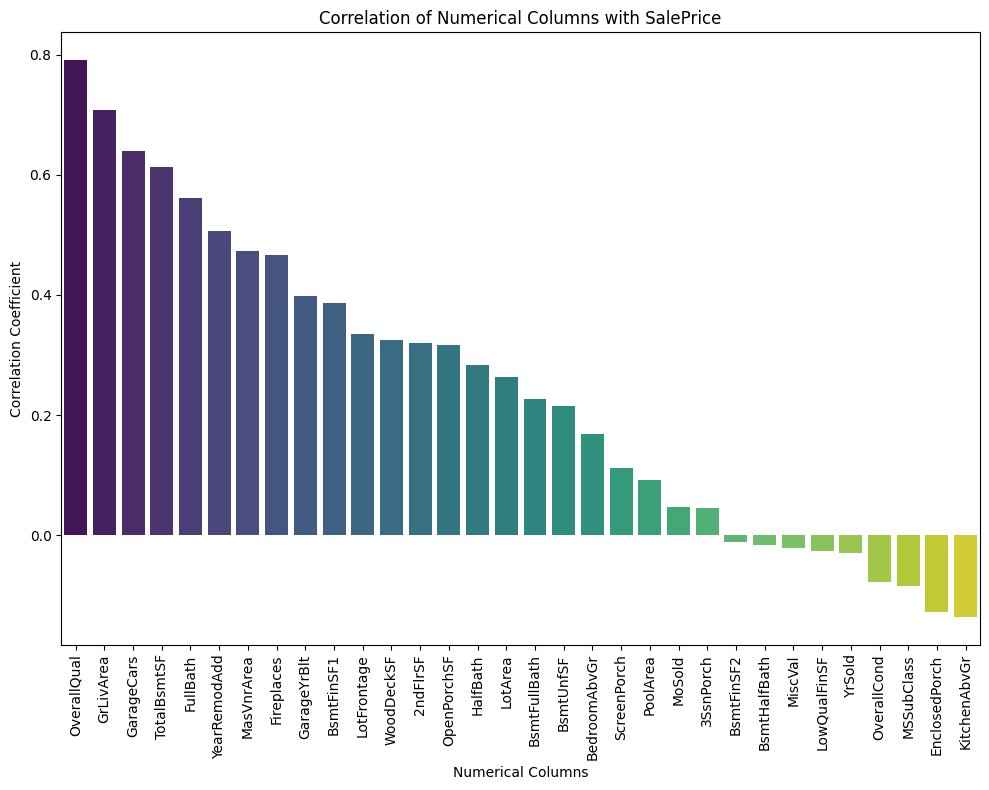

In [ ]:
# Calculate the correlation of numerical columns with SalePrice
correlation_with_target = data[numerical_columns].corr()['SalePrice'].drop('SalePrice')

plt.figure(figsize=(10, 8))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette="viridis", order=correlation_with_target.sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.title("Correlation of Numerical Columns with SalePrice")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Numerical Columns")
plt.tight_layout()
plt.show()

In [ ]:
print(correlation_with_target.sort_values(ascending=False))

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
TotalBsmtSF      0.613581
FullBath         0.560664
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
GarageYrBlt      0.397778
BsmtFinSF1       0.386420
LotFrontage      0.334771
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


summary:
-Based on this plot, features like ScreenPorch, PoolArea, MoSold, 3SsnPorch, BsmtFinSF2, BsmtHalfBath, MiscVal, LowQualFinSF, and YrSold have very low correlations and could be candidates for removal during dimensionality reduction, depending on your modeling approach and further analysis.

In [ ]:
columns_to_drop = ['ScreenPorch', 'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath', 'MiscVal', 'LowQualFinSF', 'YrSold']
data = data.drop(columns=columns_to_drop)
print("\nRows and columns in dataset after dropping columns: ",data.shape)


Rows and columns in dataset after dropping columns:  (1460, 61)


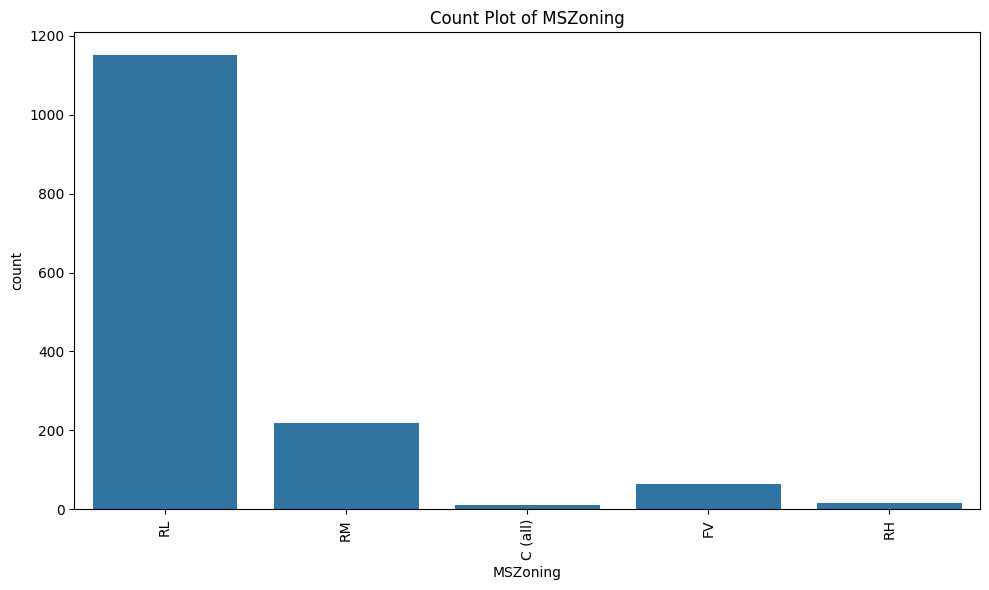

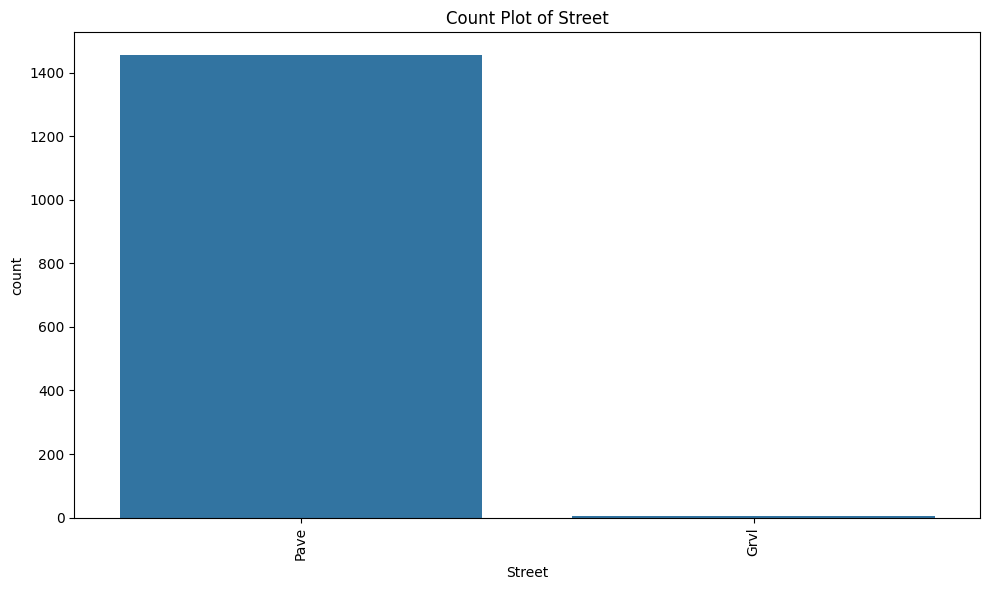

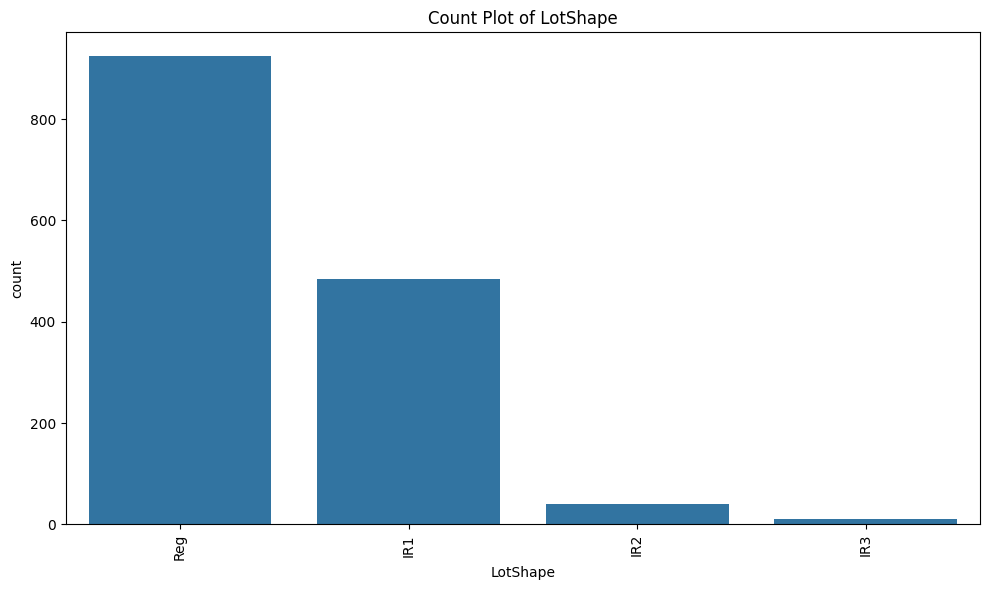

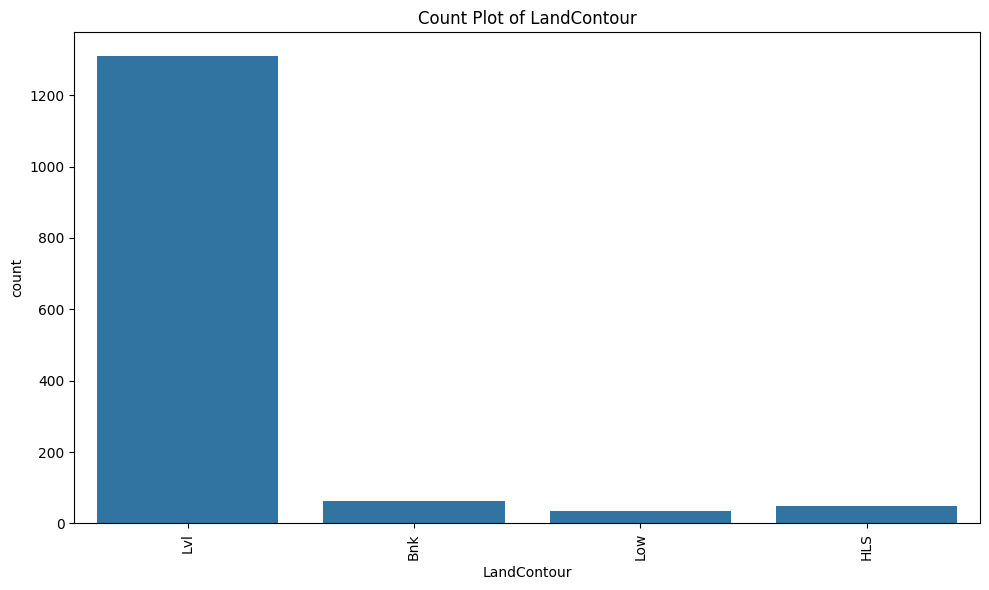

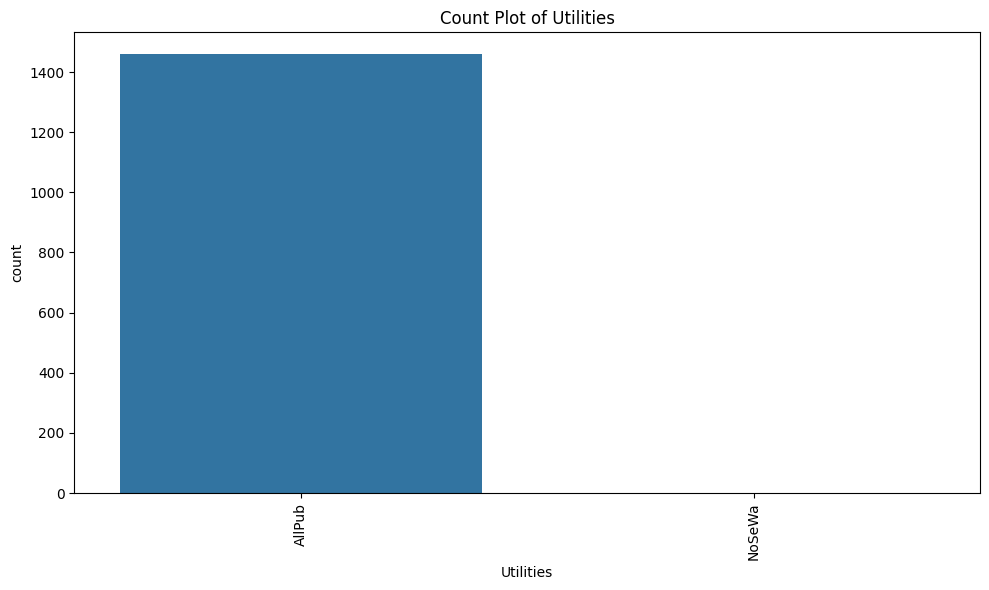

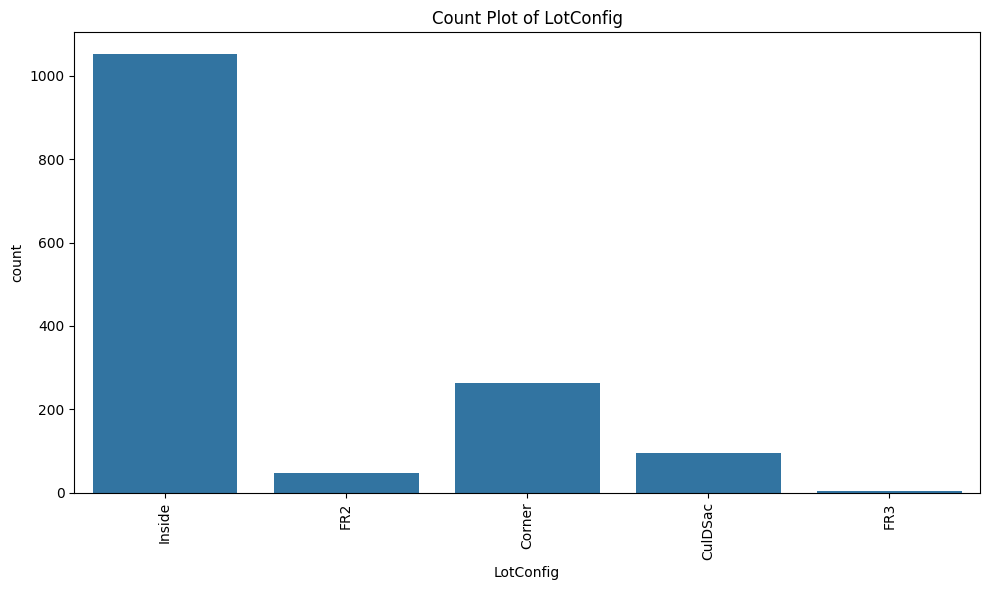

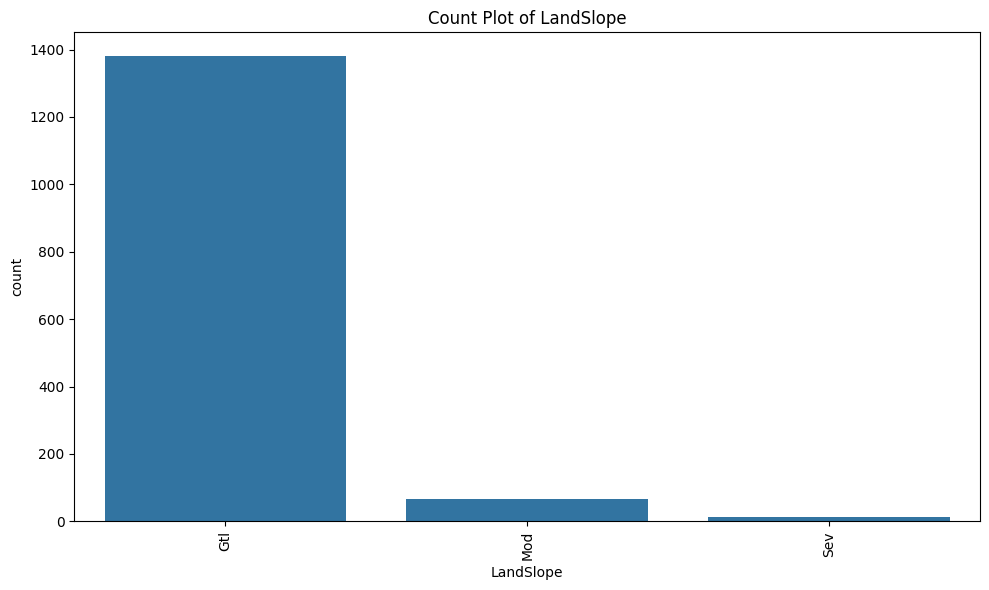

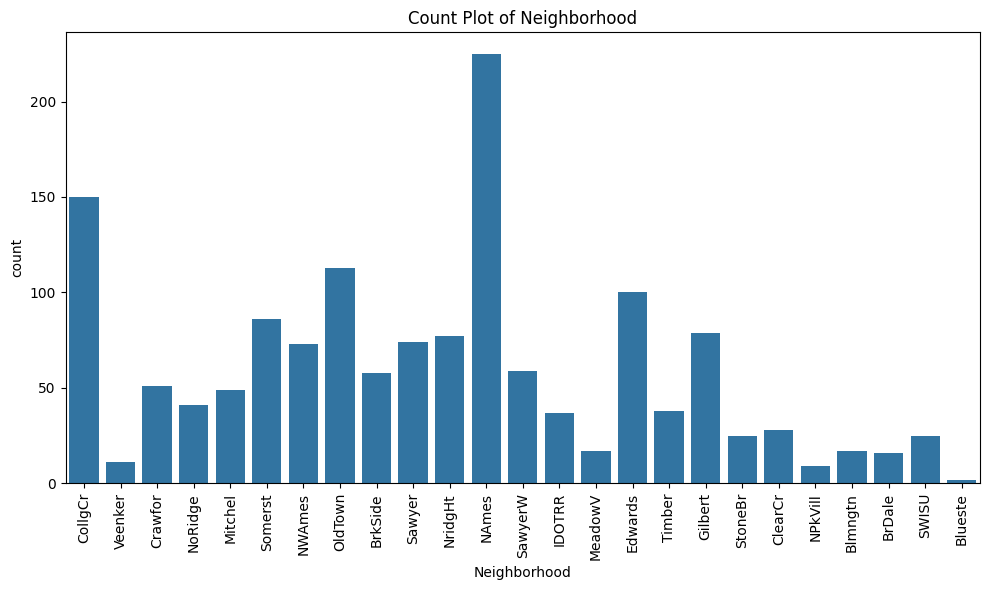

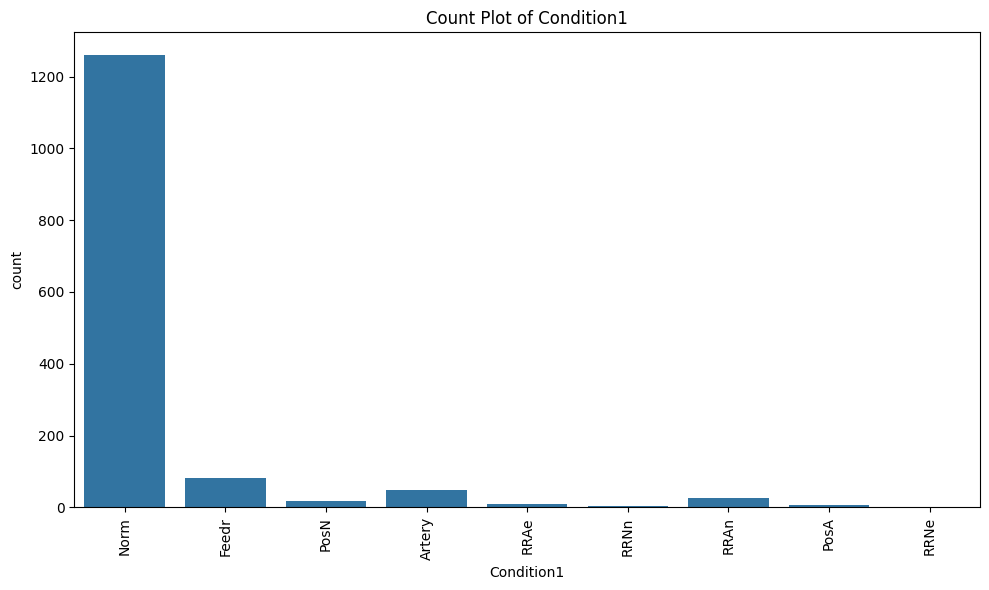

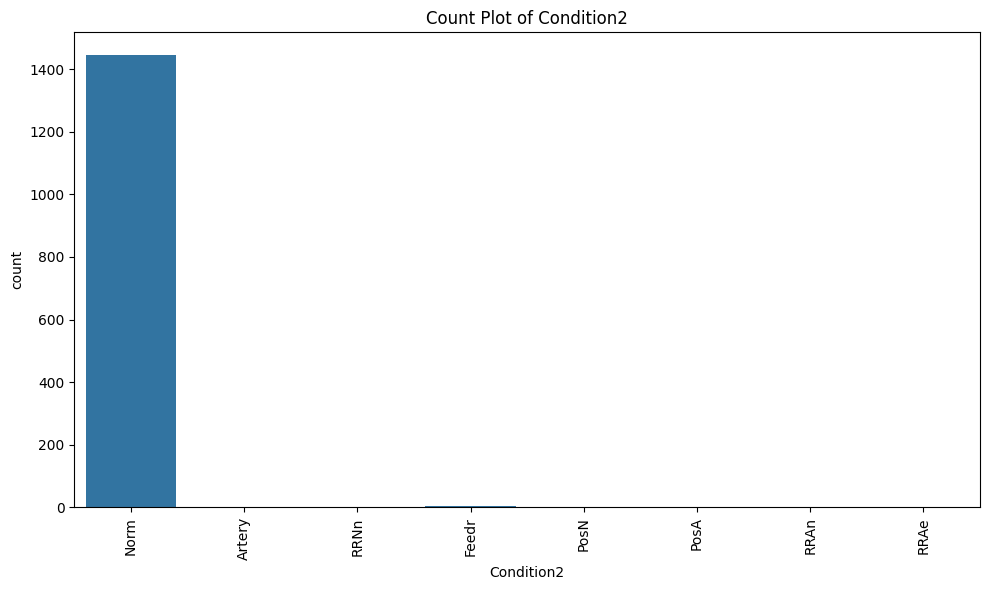

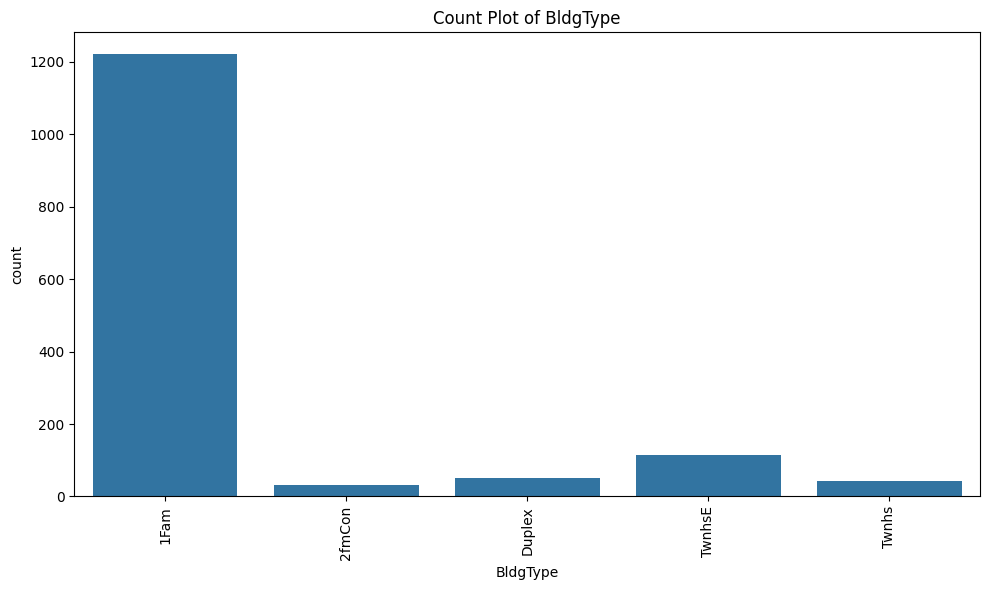

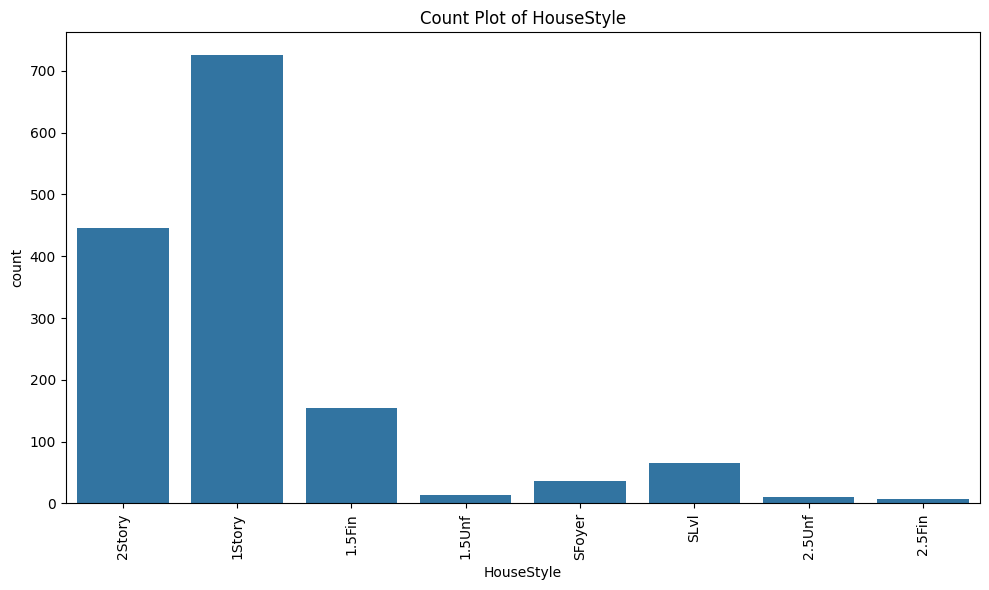

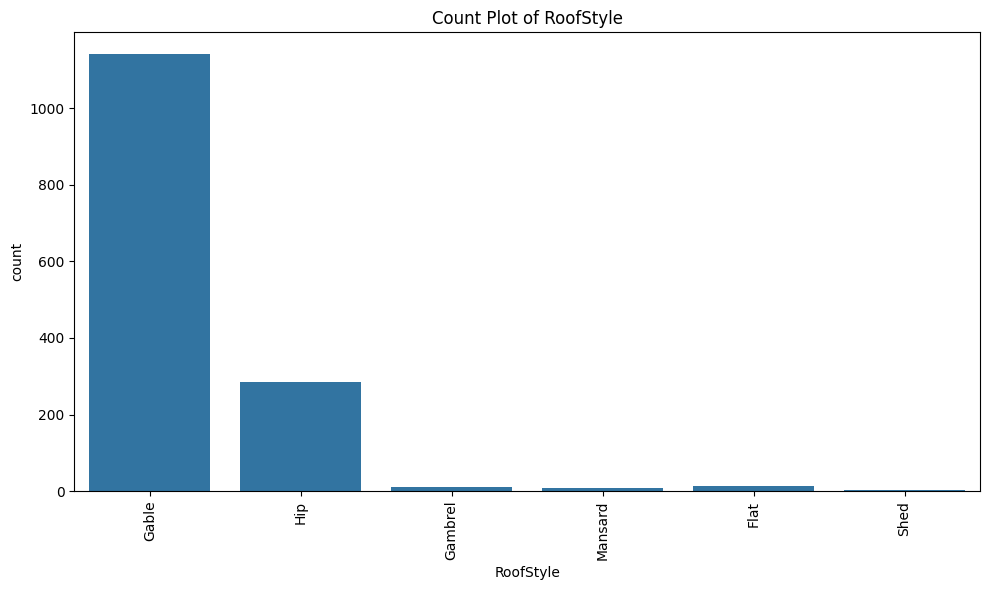

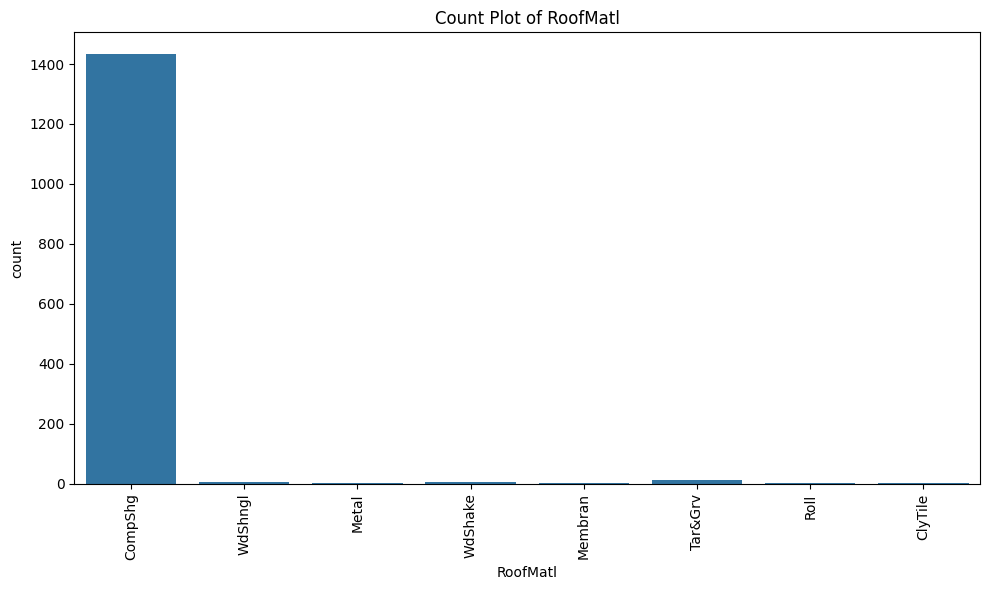

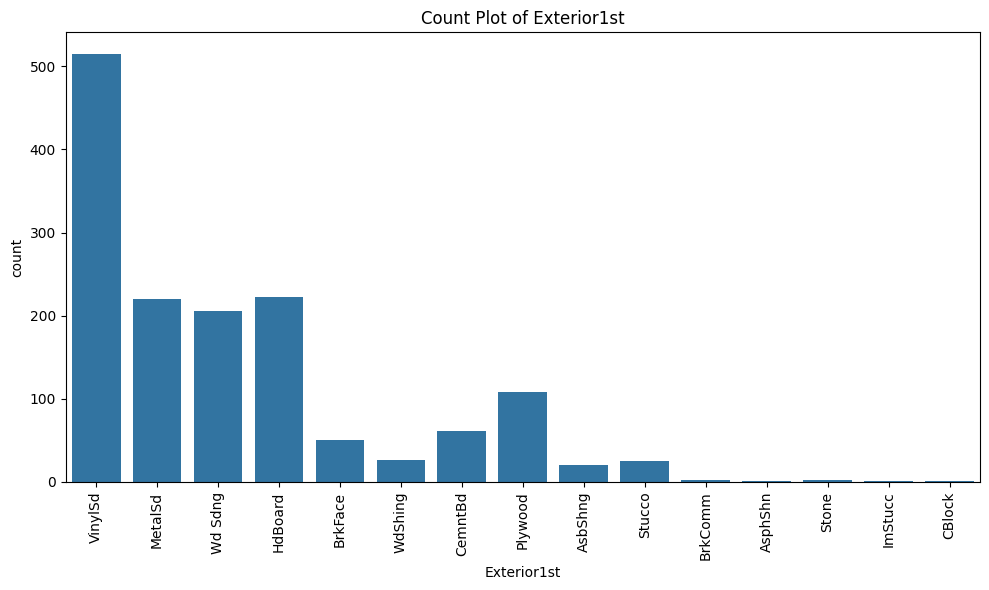

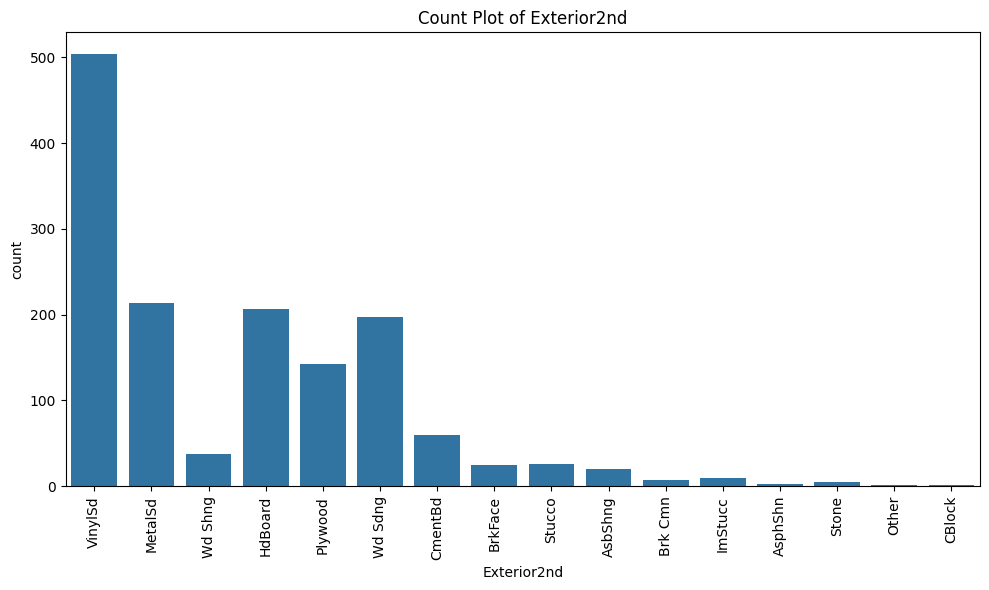

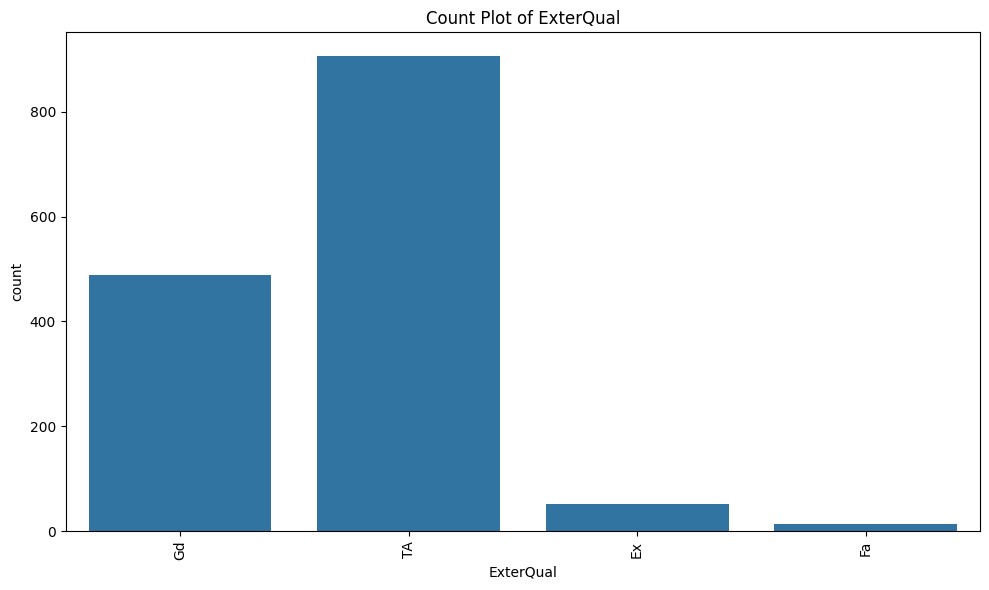

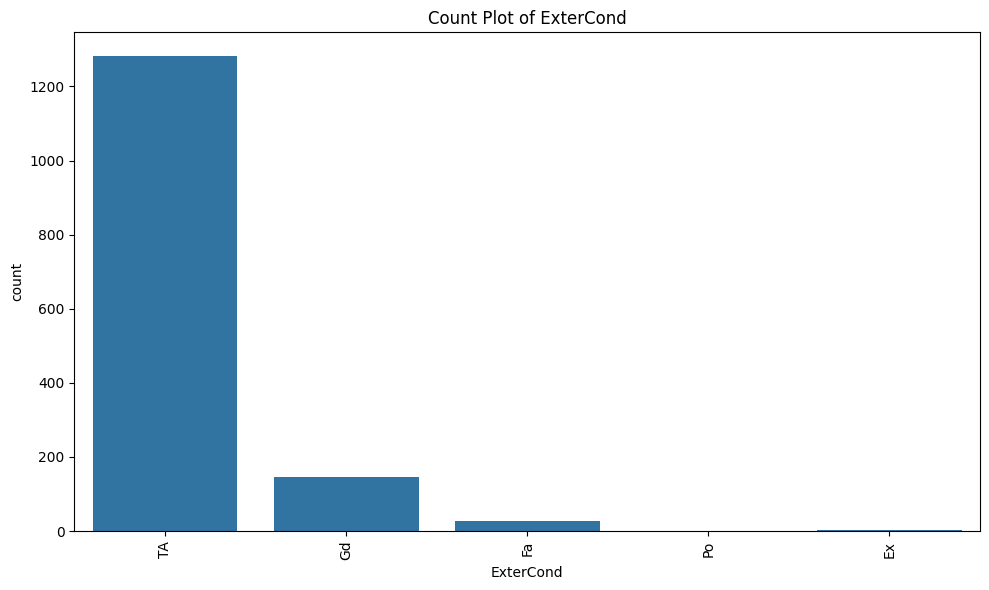

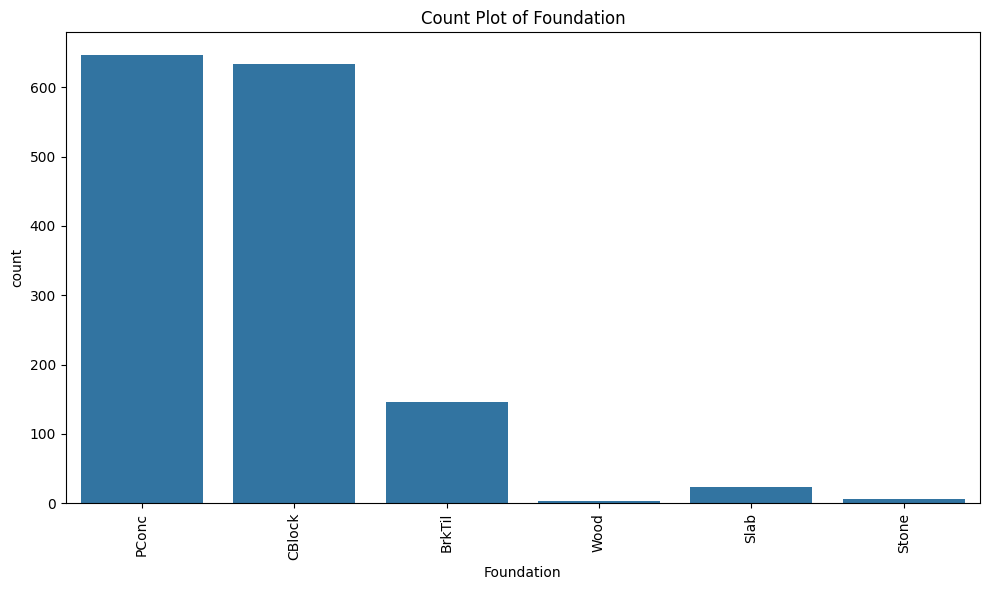

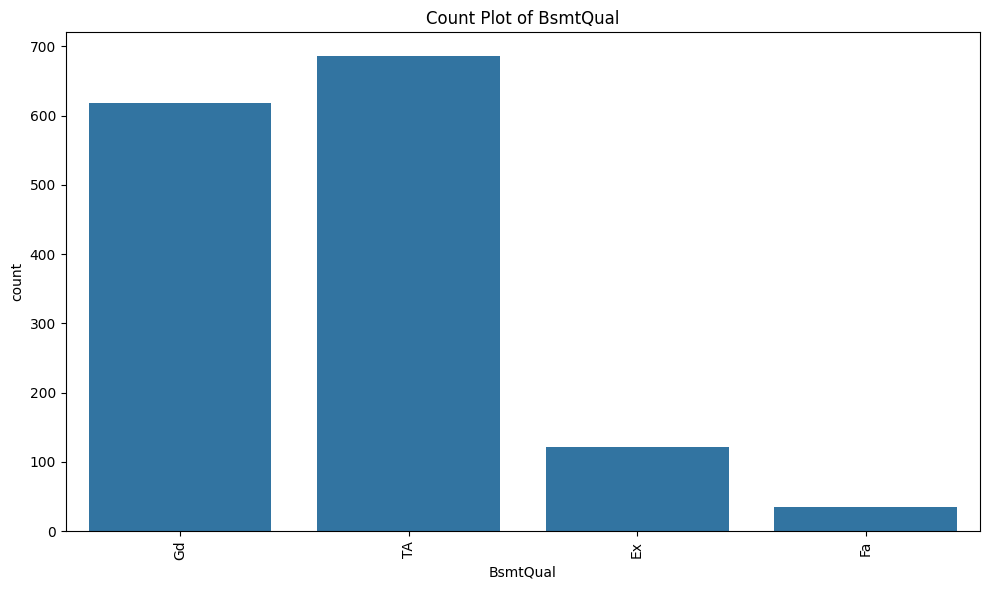

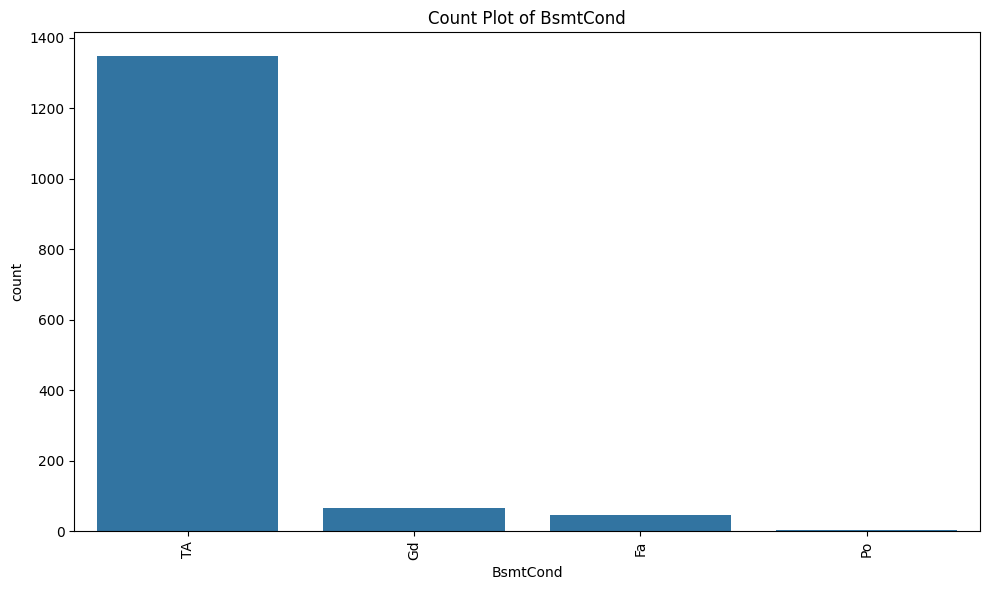

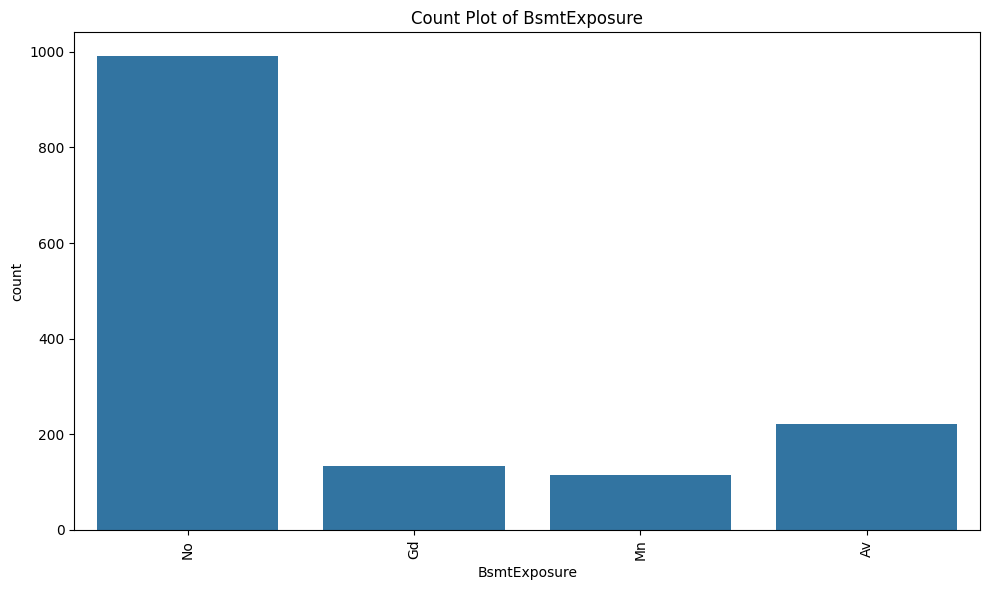

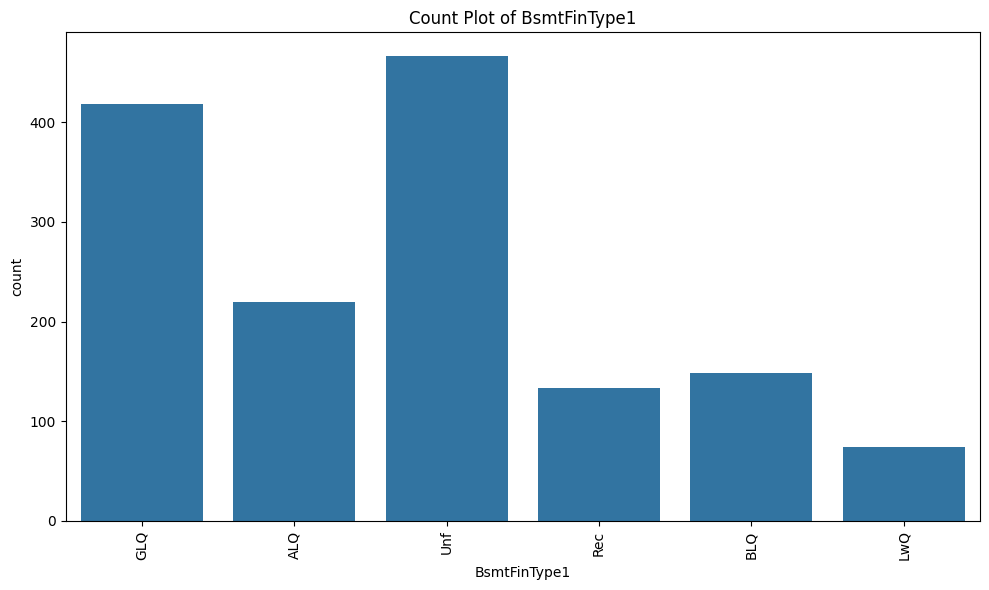

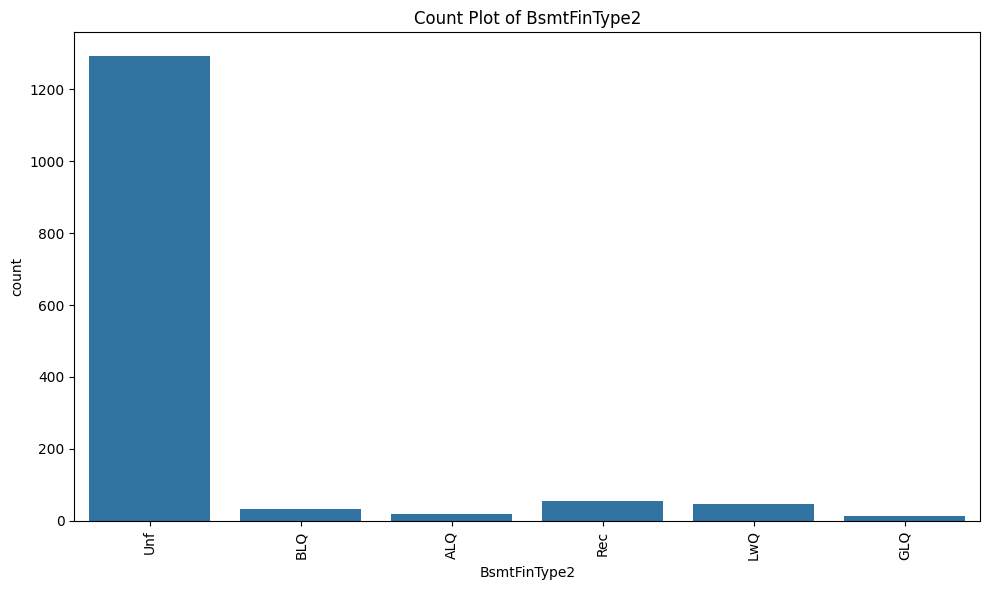

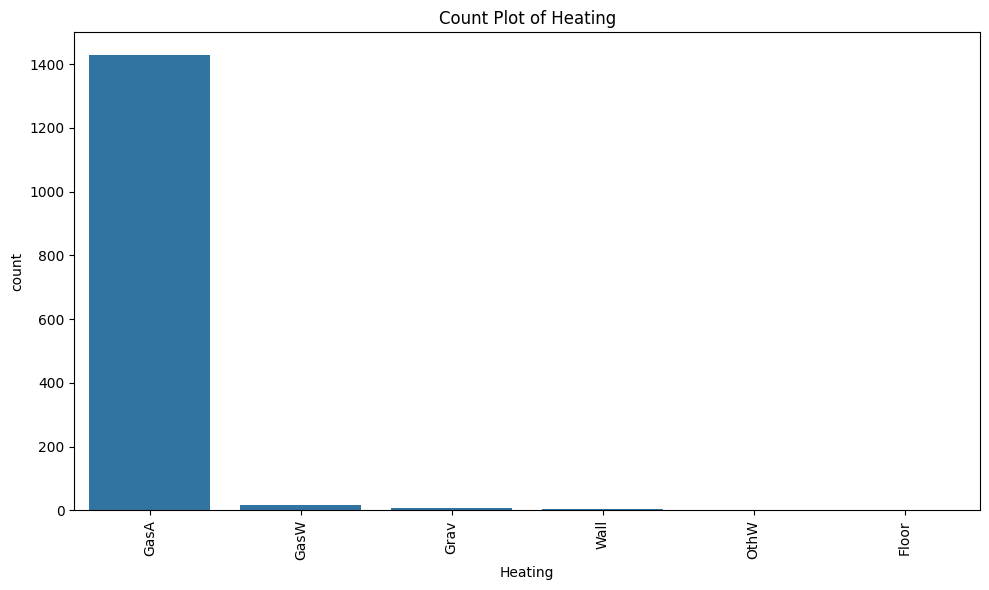

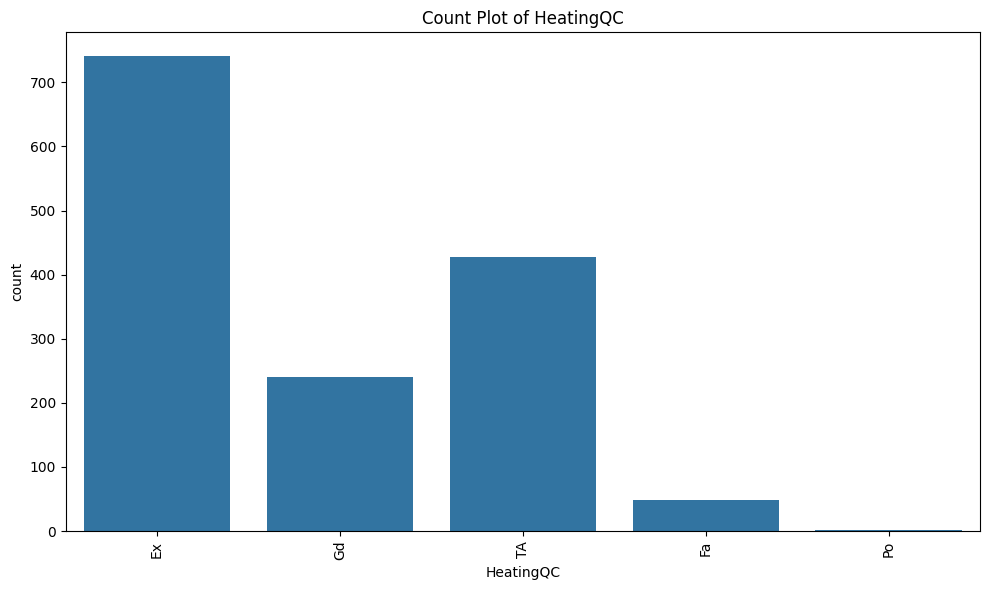

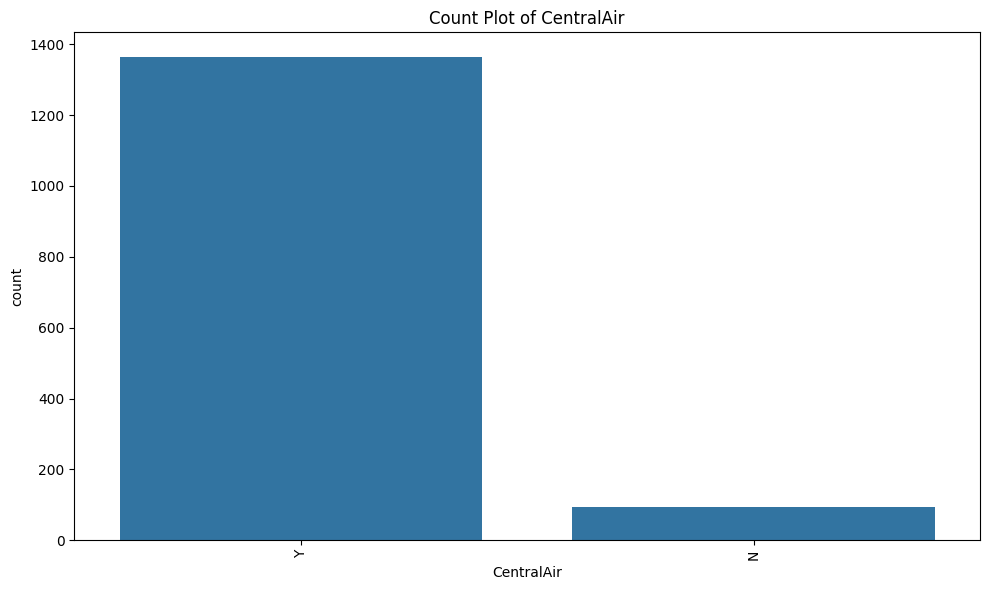

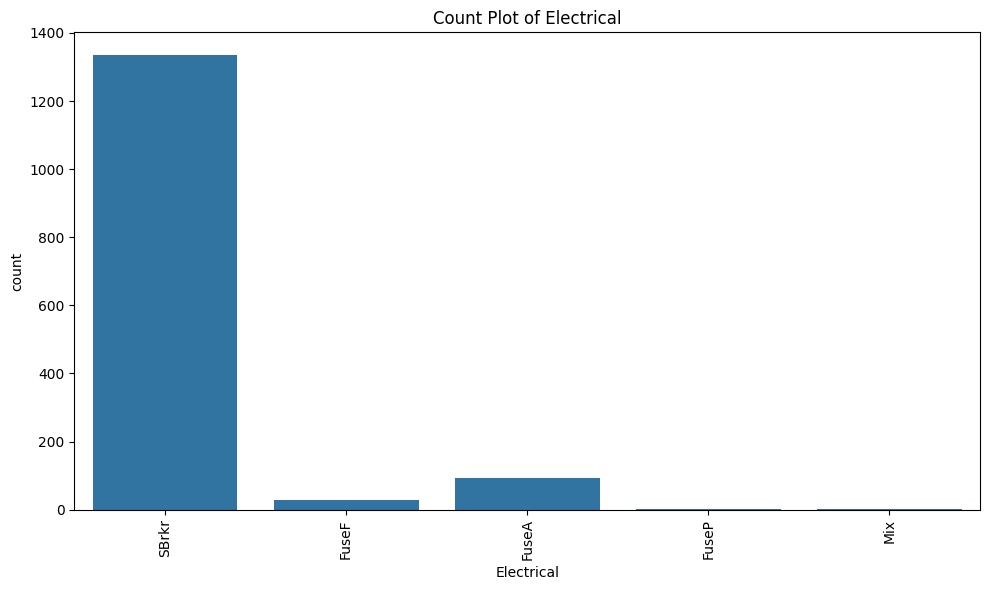

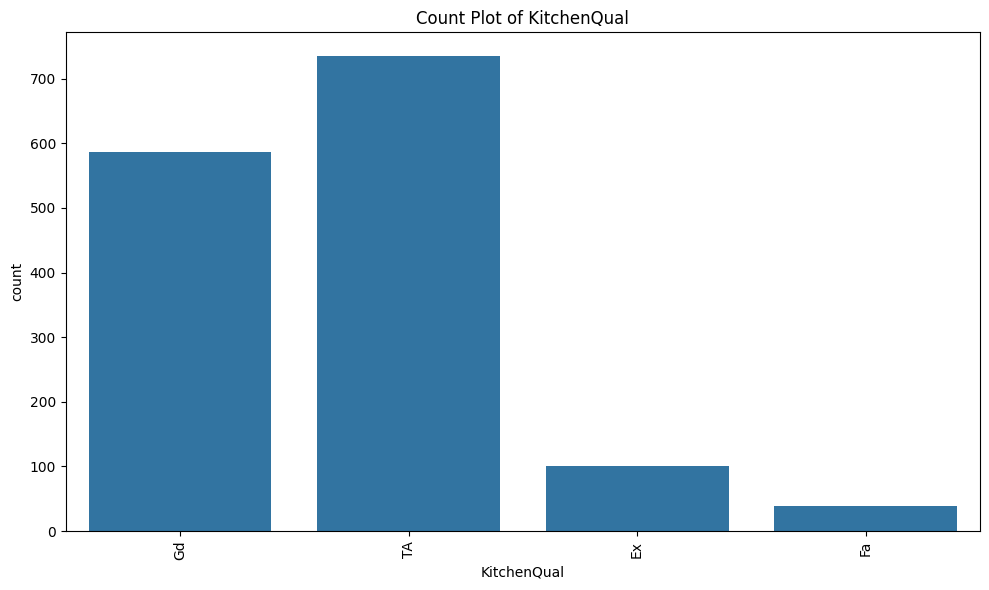

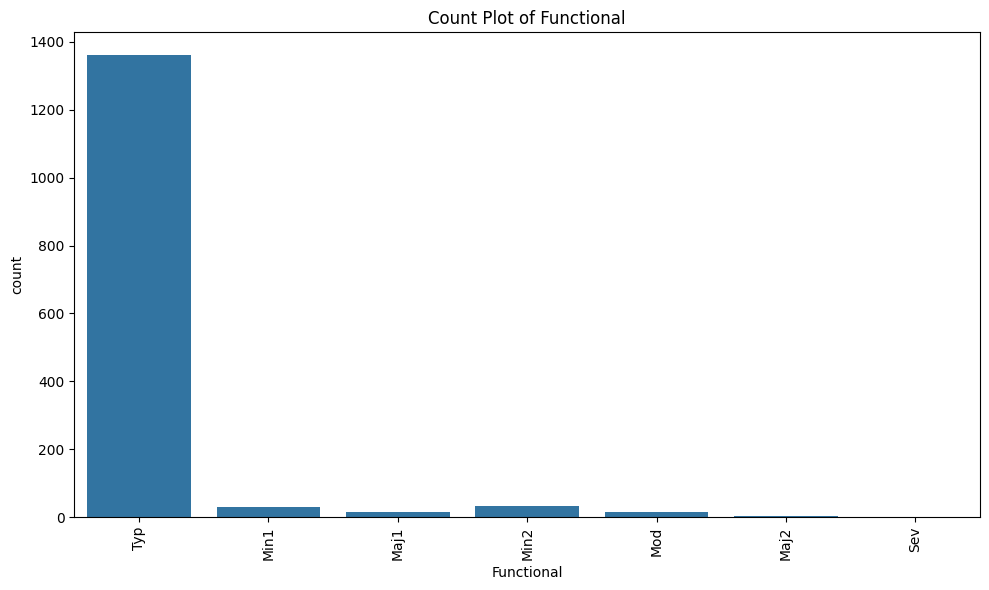

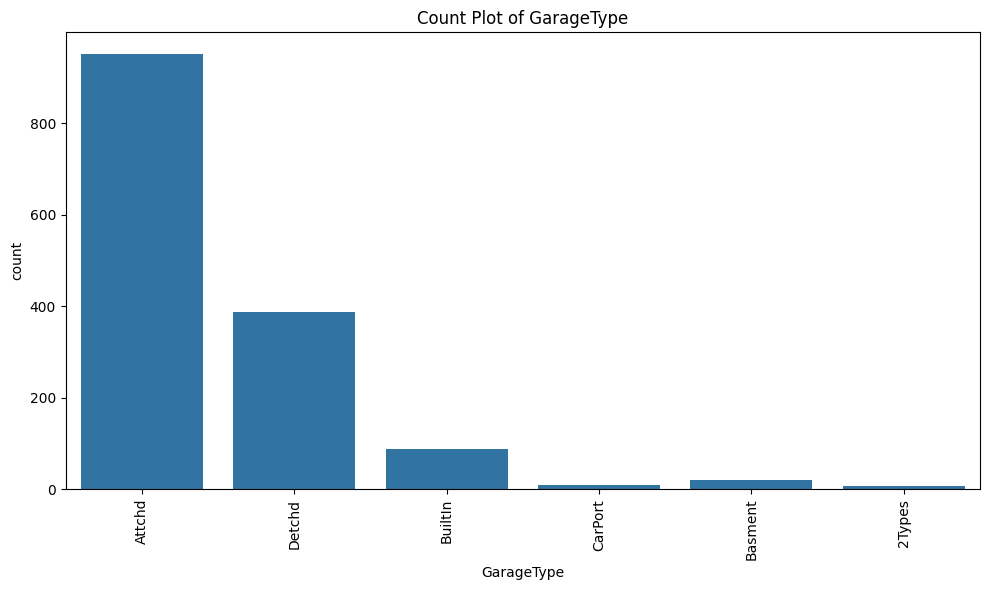

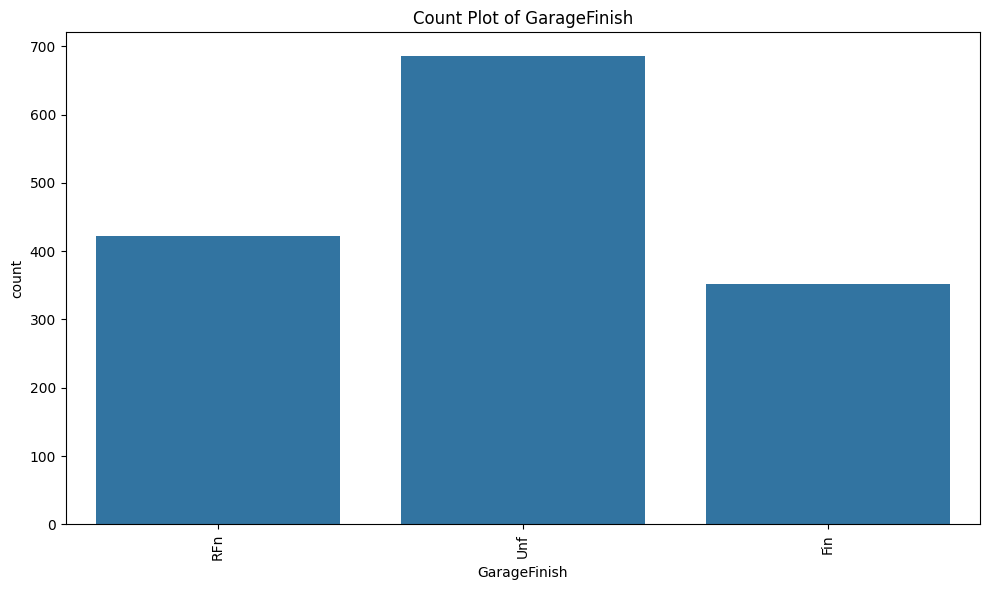

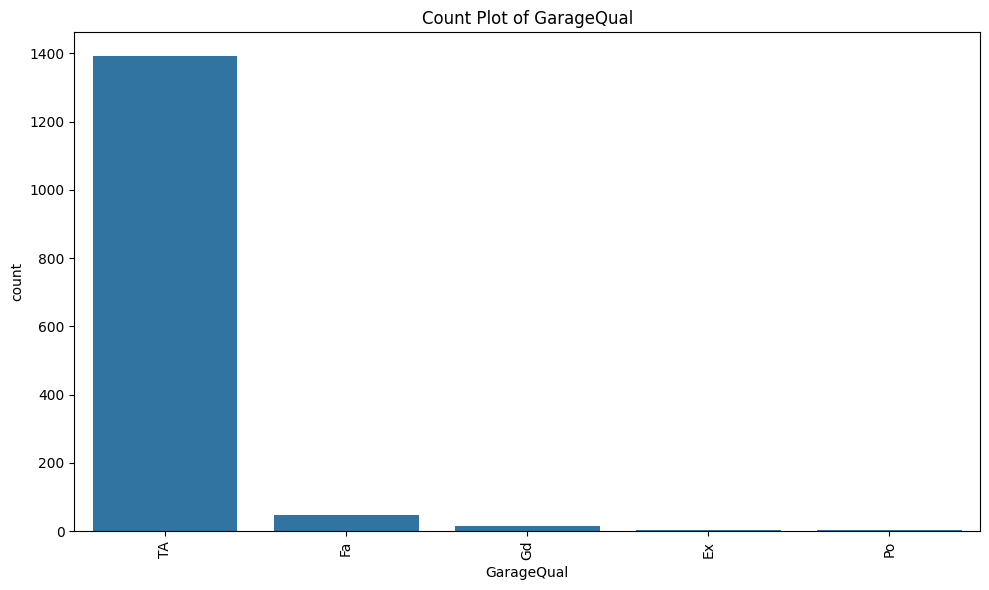

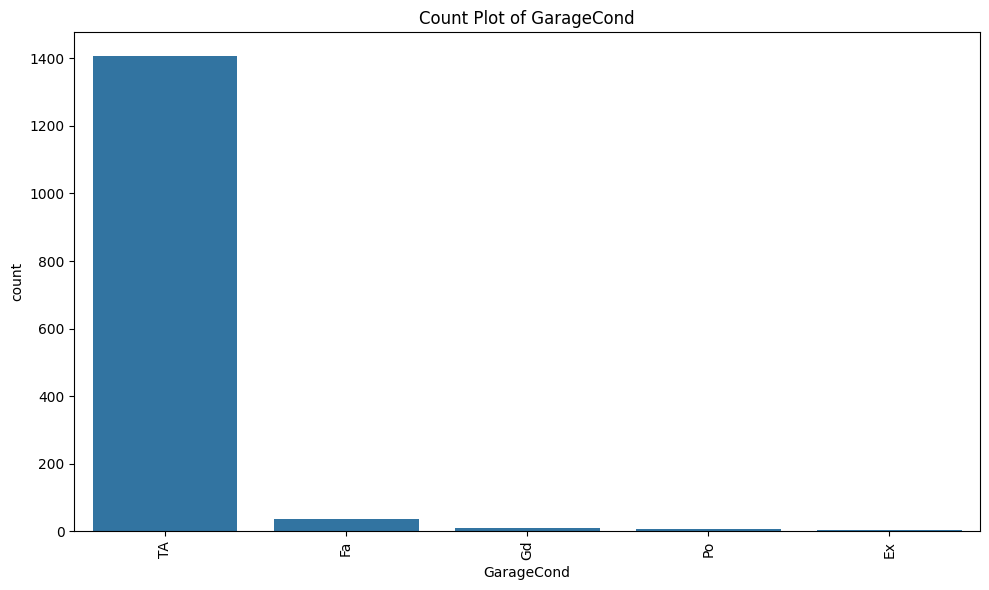

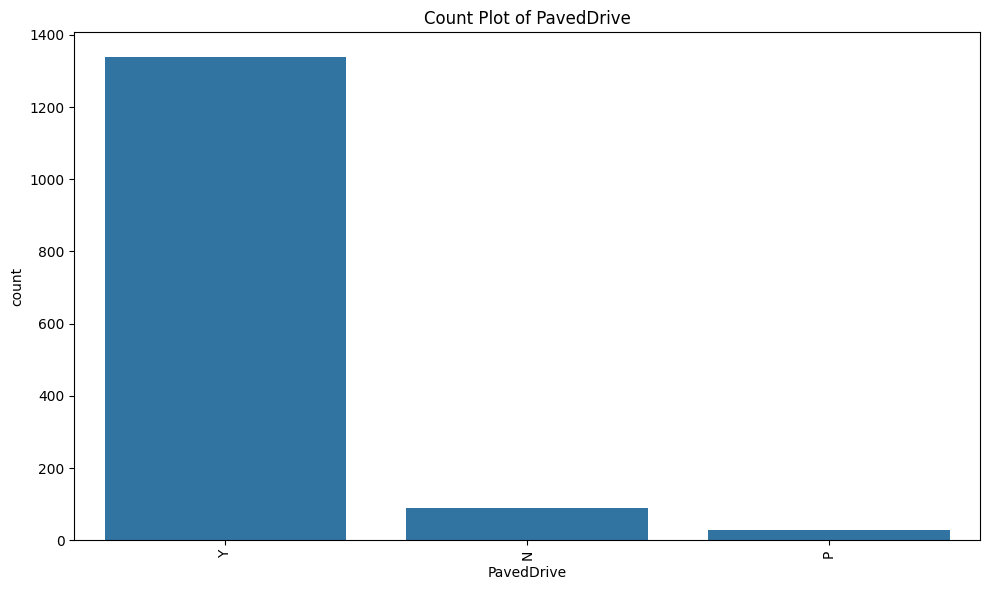

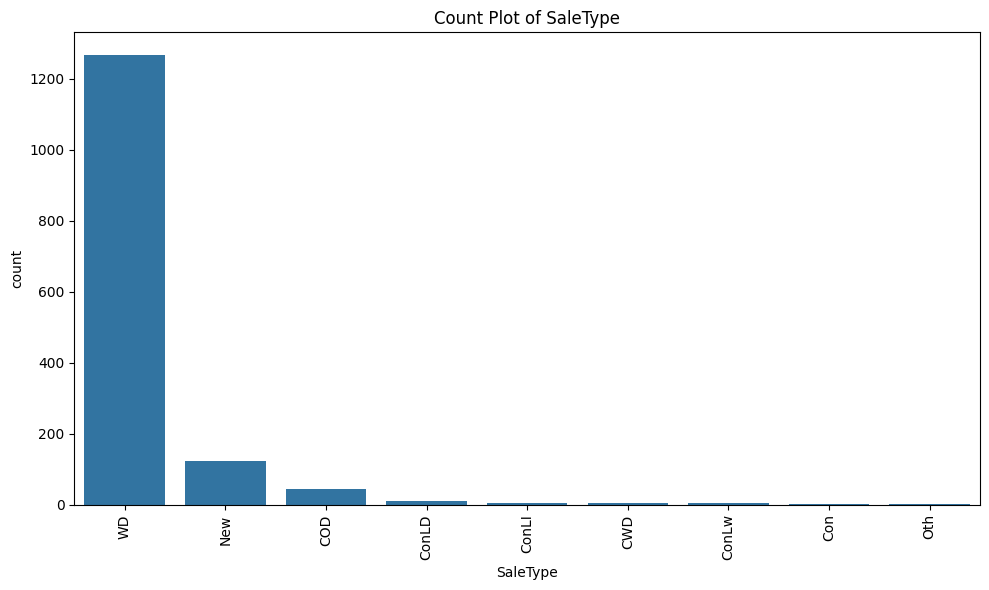

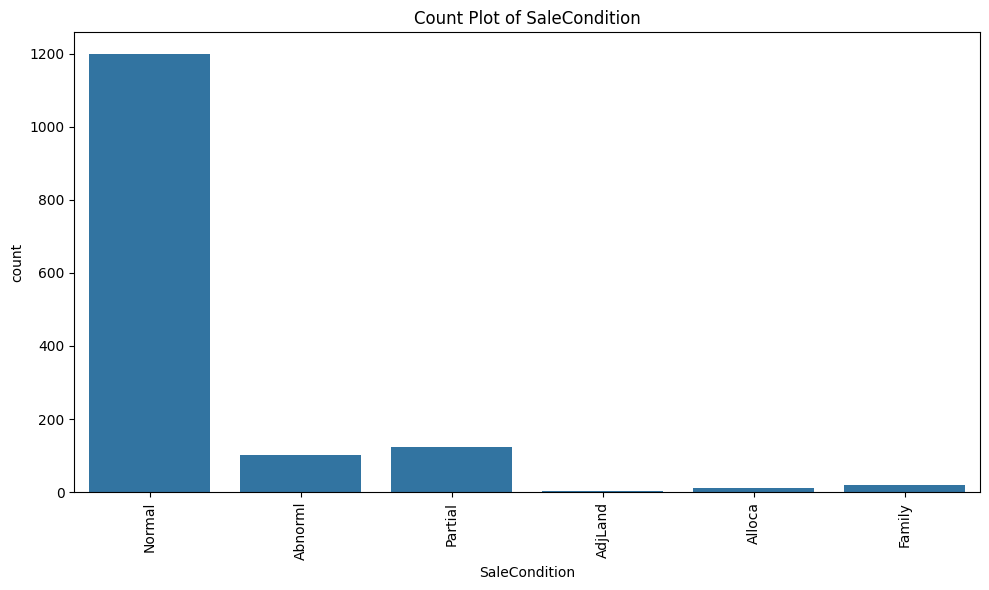

In [ ]:
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=data)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

Summary:
attributes which can be removed-
Street, utilities, condition1, condition2, RoofMatl, BsmtCond, Heating, Functional, GarageQual(doubt), GarageCond(doubt)

In [ ]:
data.drop(columns=['Street', 'Utilities', 'Condition1', 'Condition2', 'RoofMatl', 'BsmtCond', 'Heating', 'Functional', 'GarageQual', 'GarageCond'], inplace=True)
print("\nRows and columns in dataset after dropping columns: ",data.shape)


Rows and columns in dataset after dropping columns:  (1460, 51)


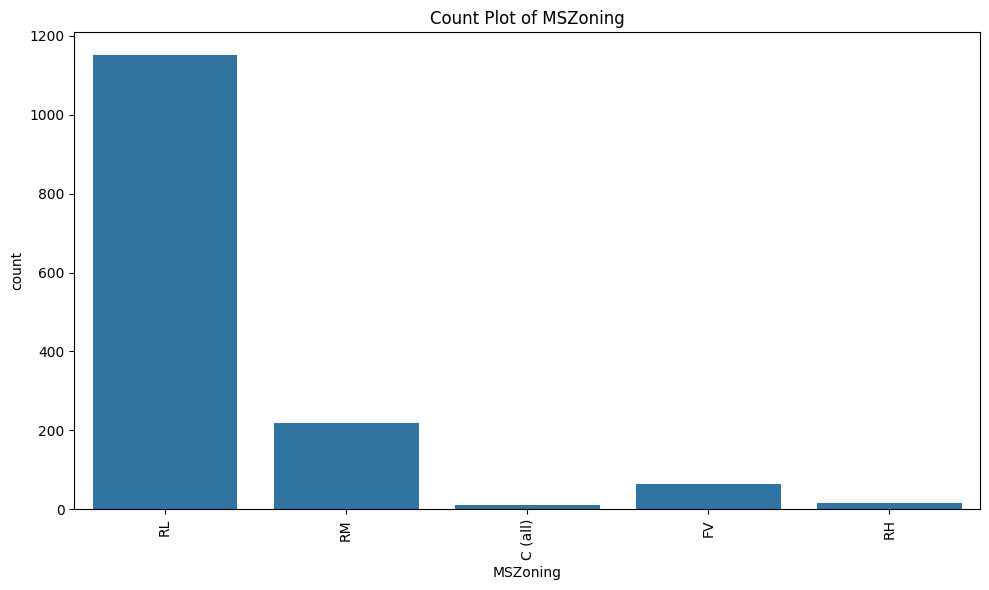

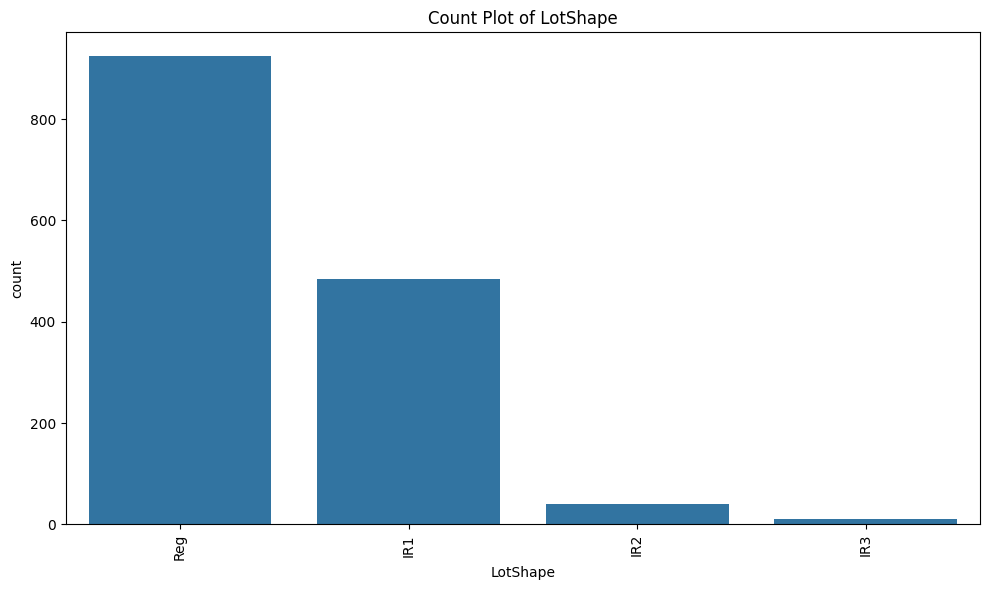

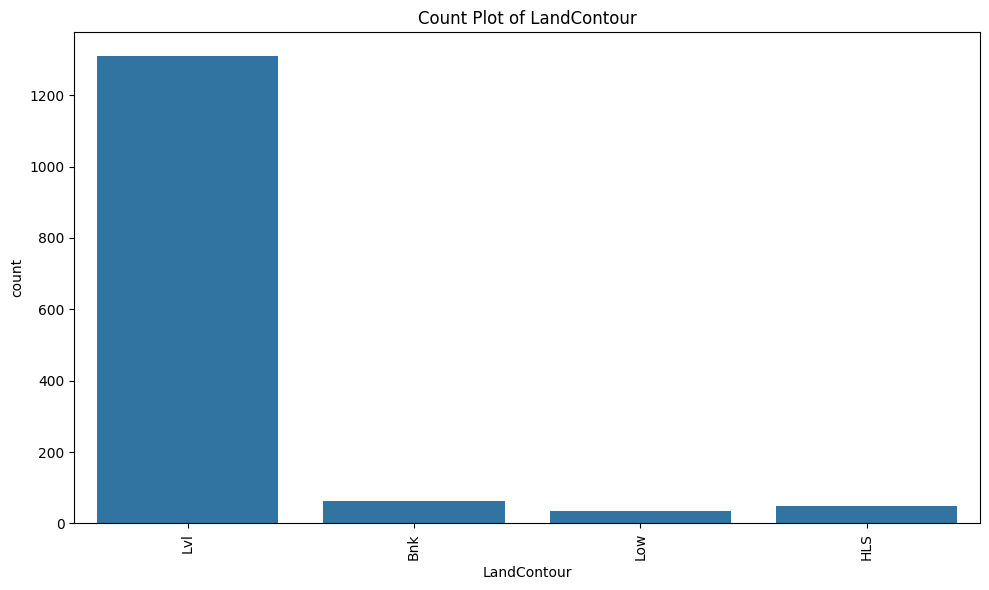

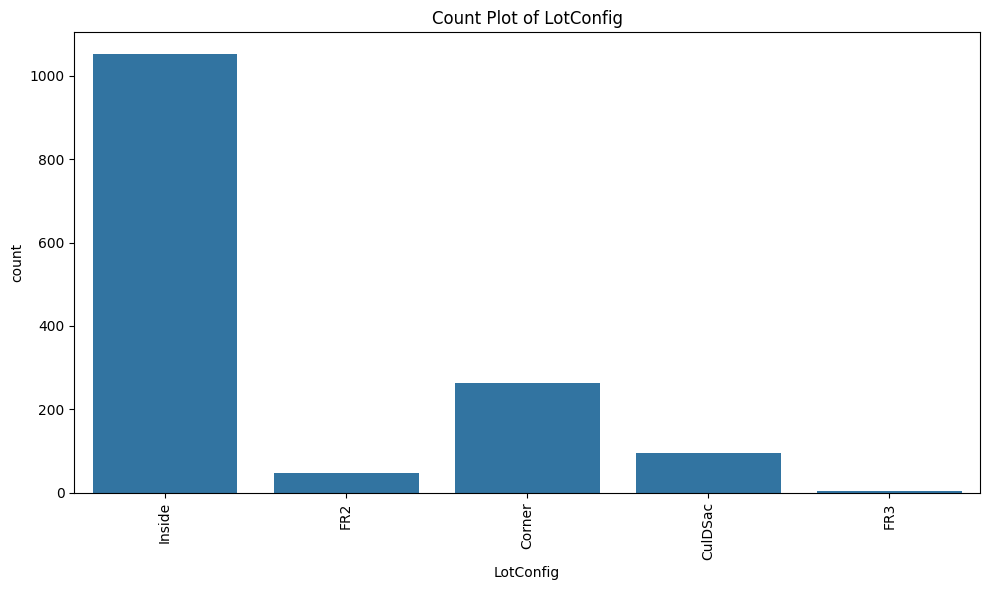

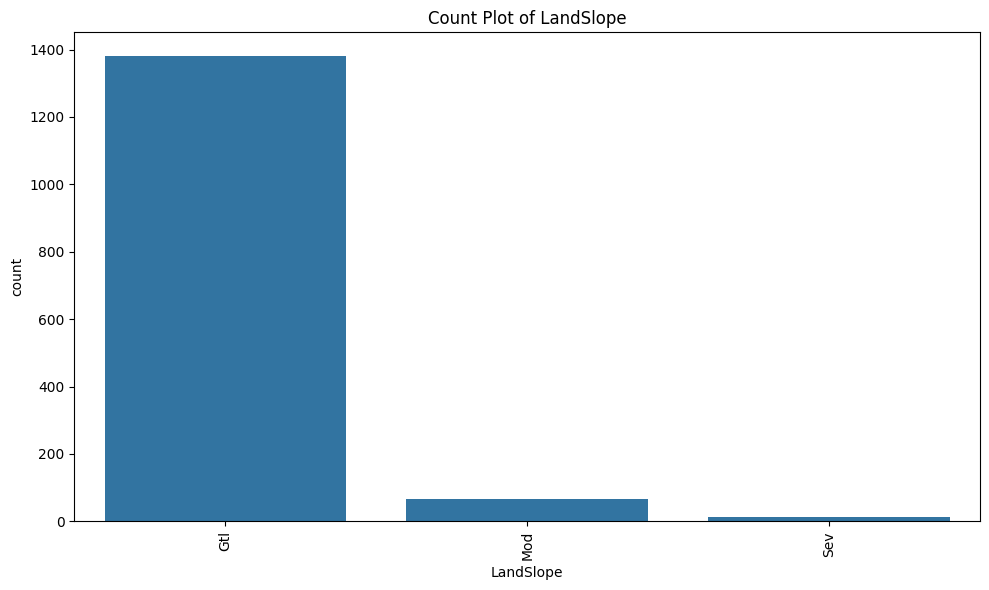

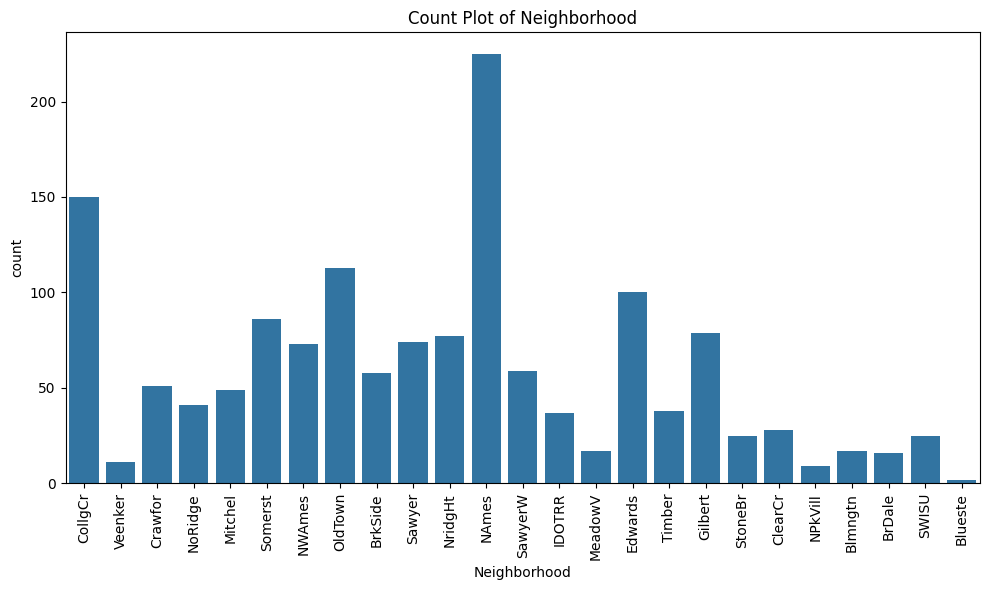

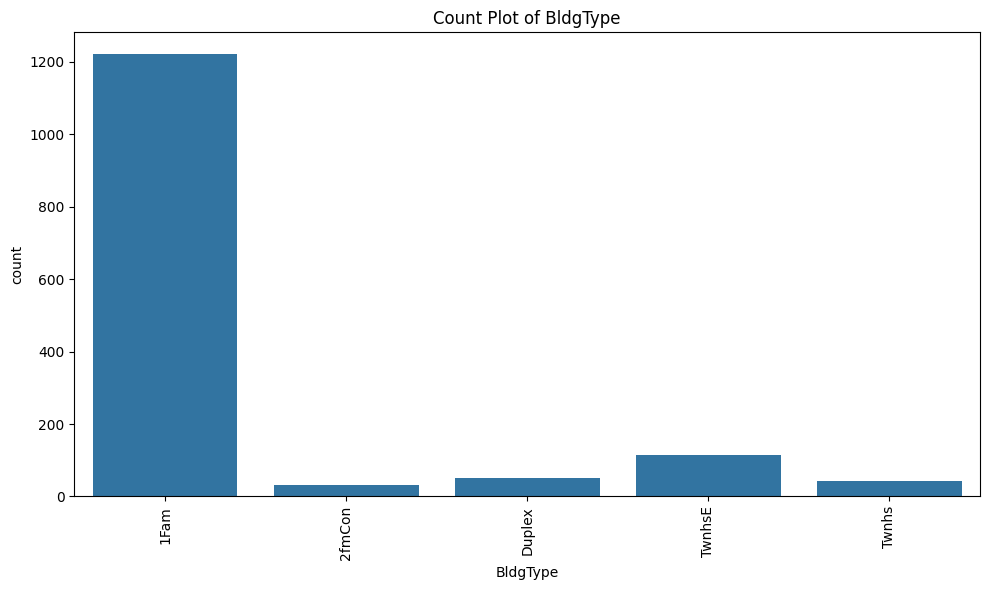

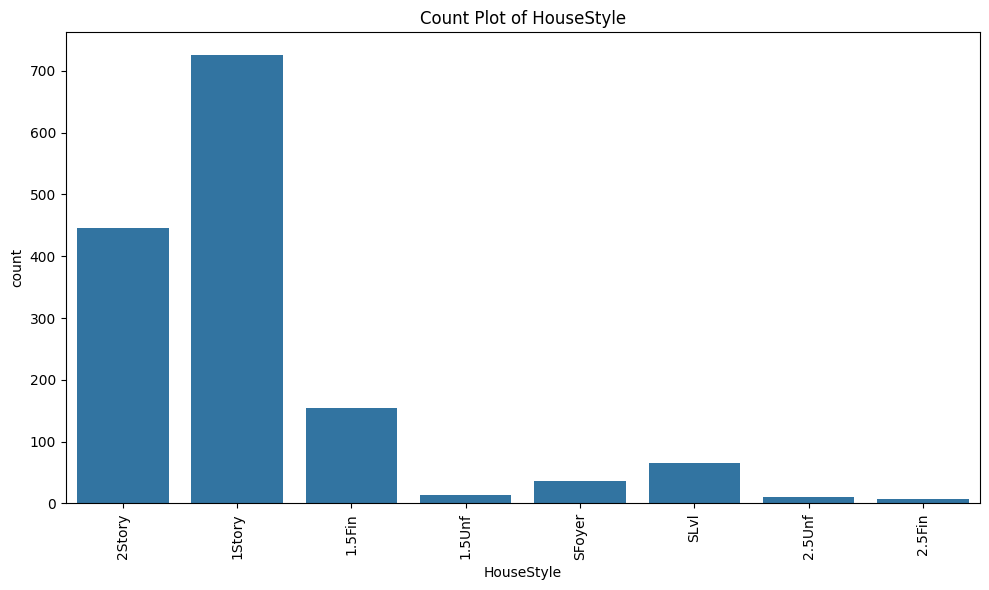

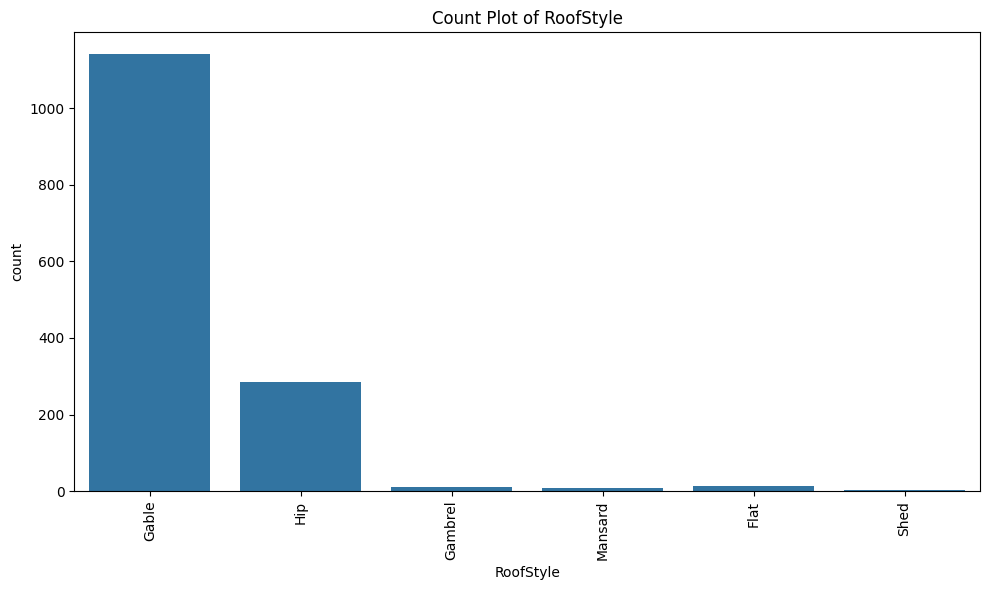

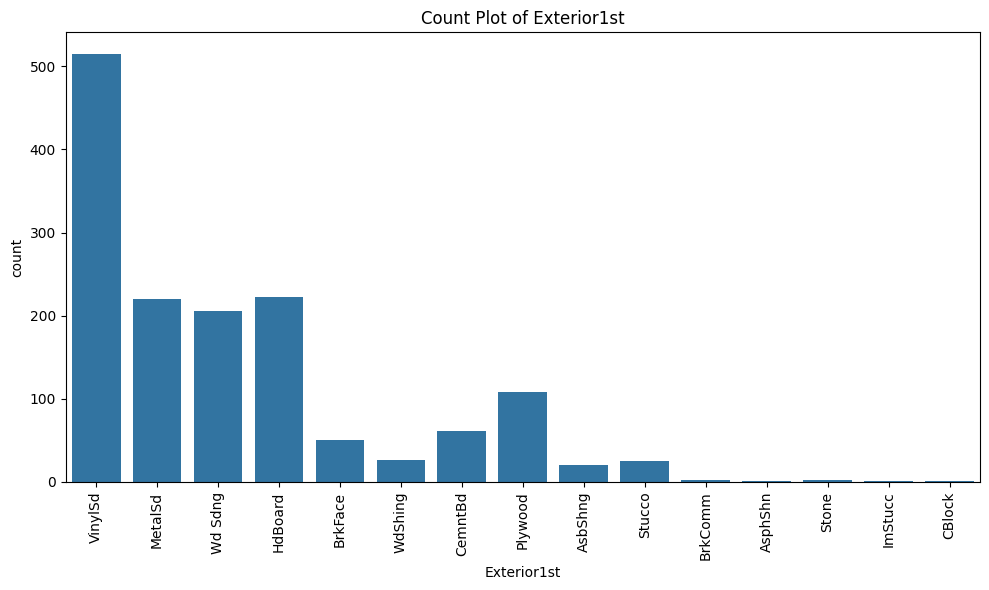

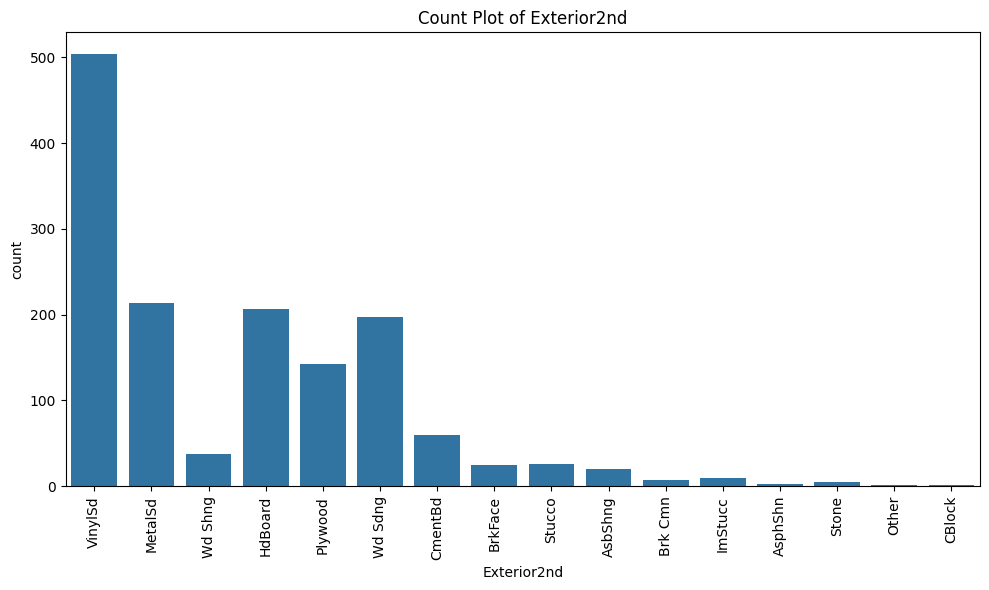

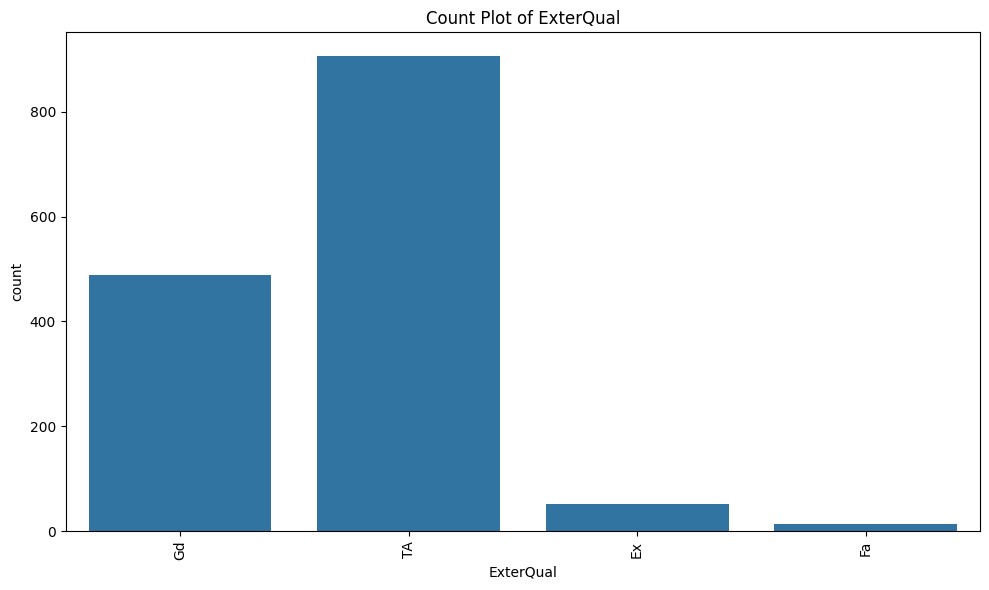

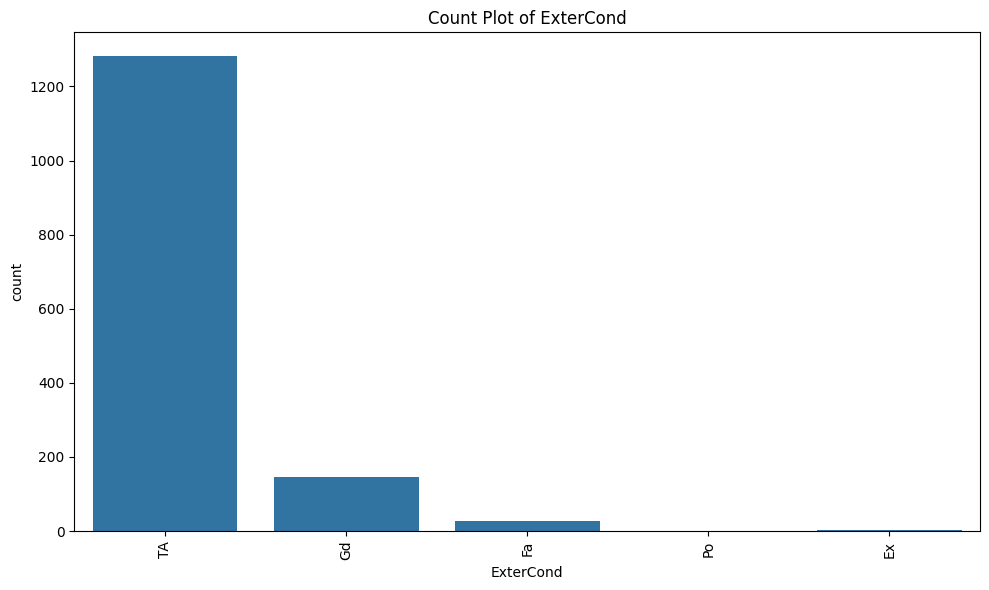

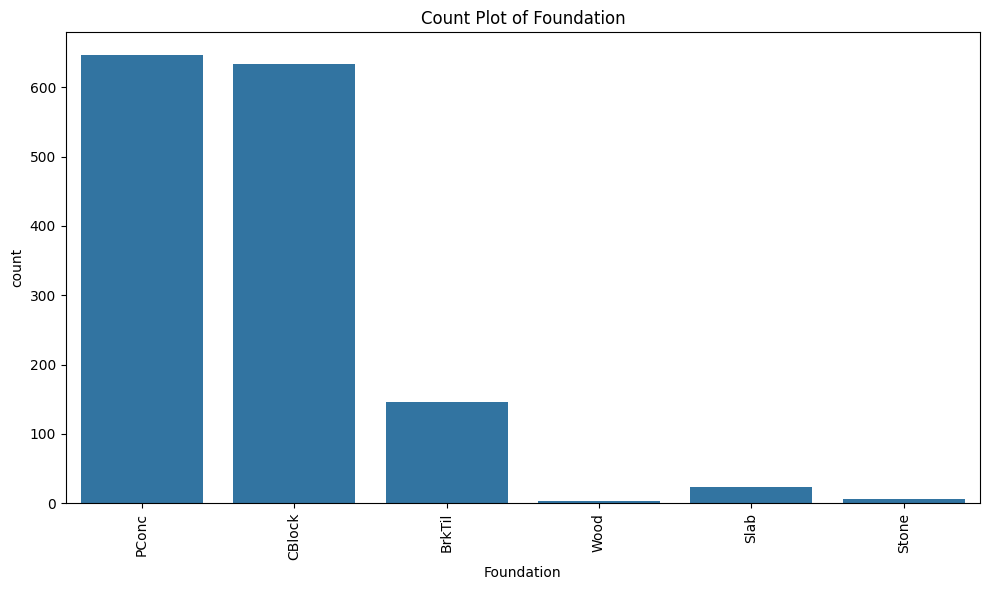

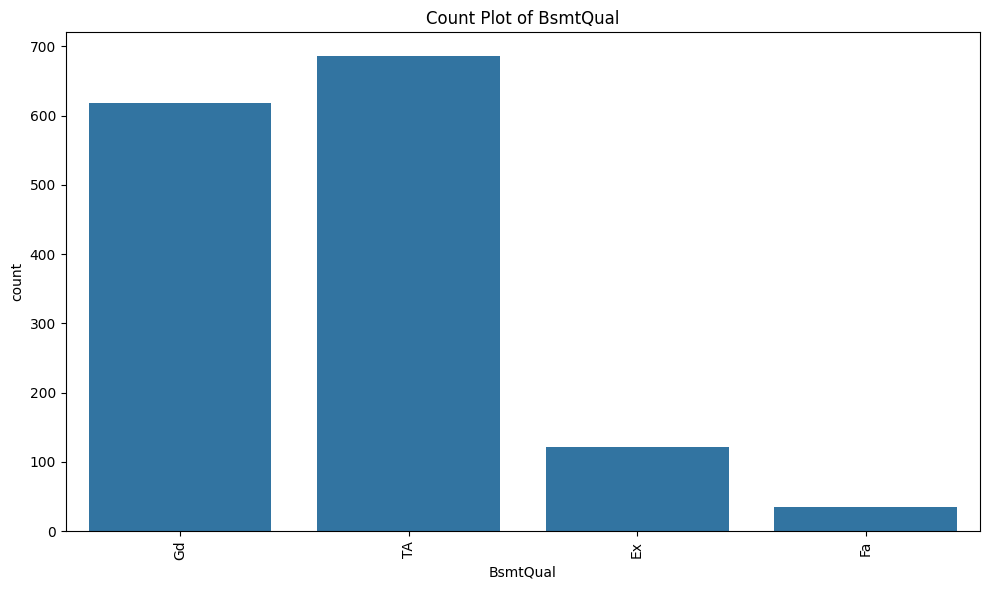

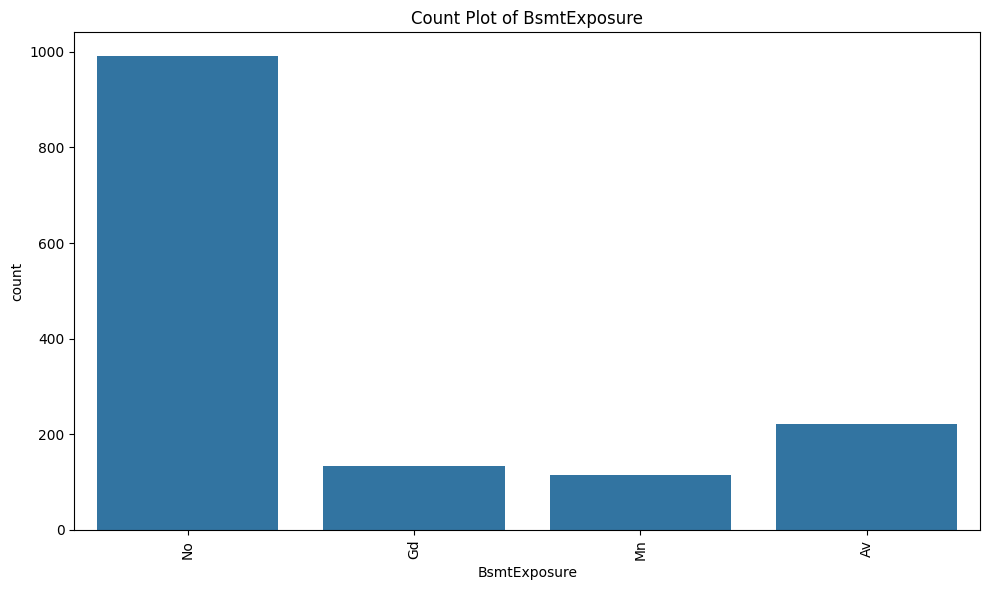

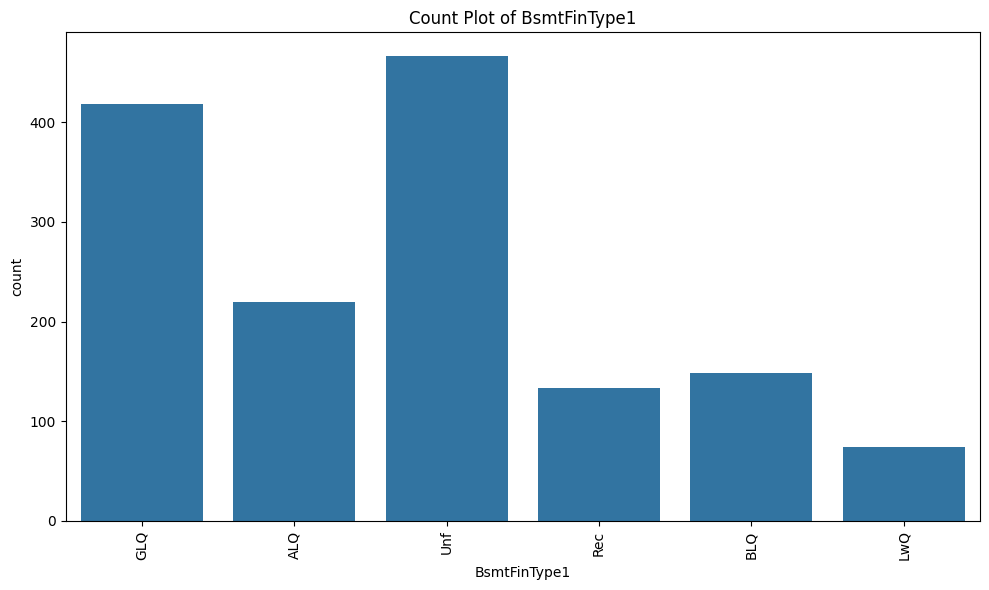

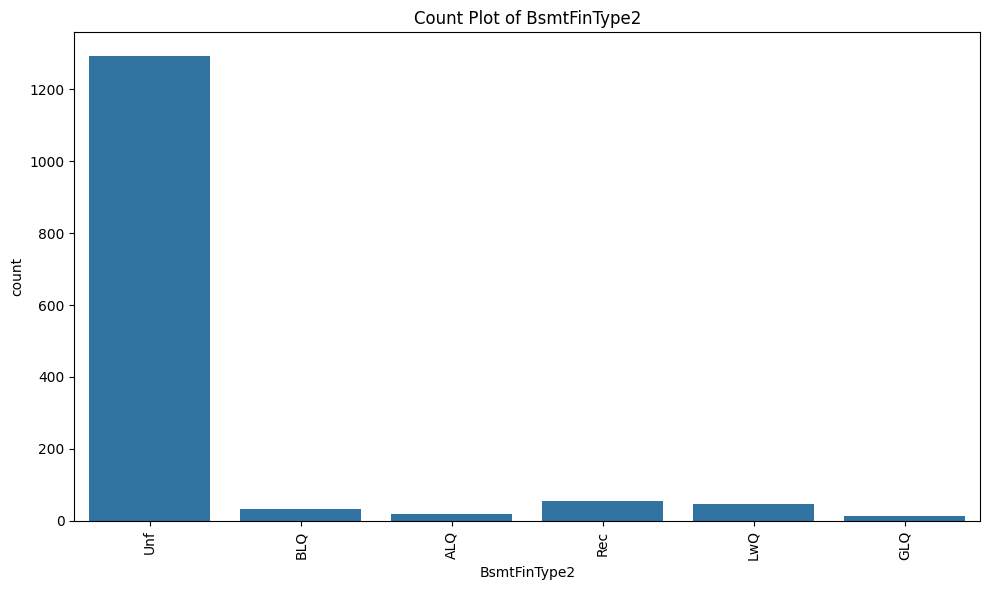

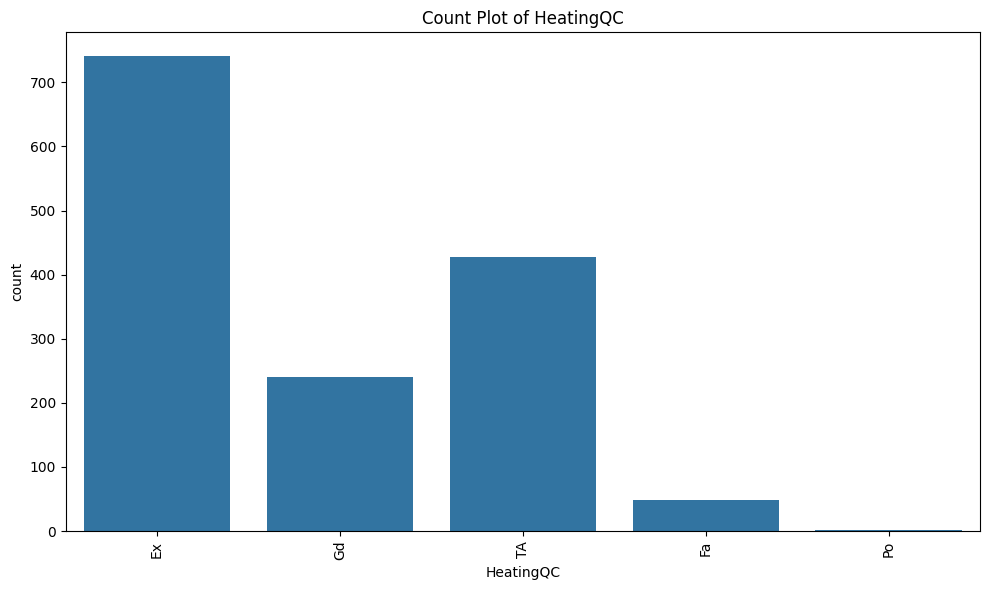

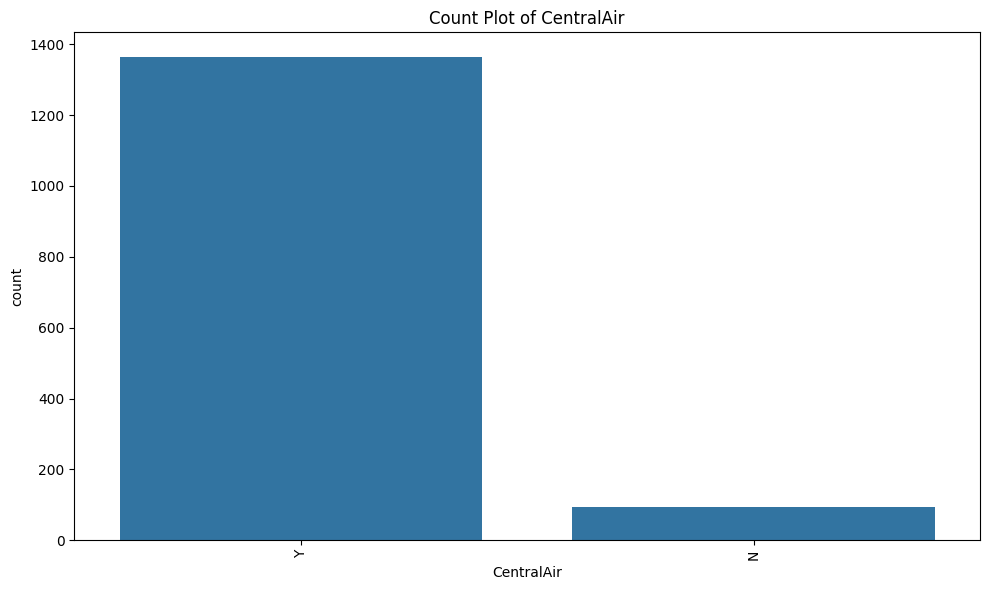

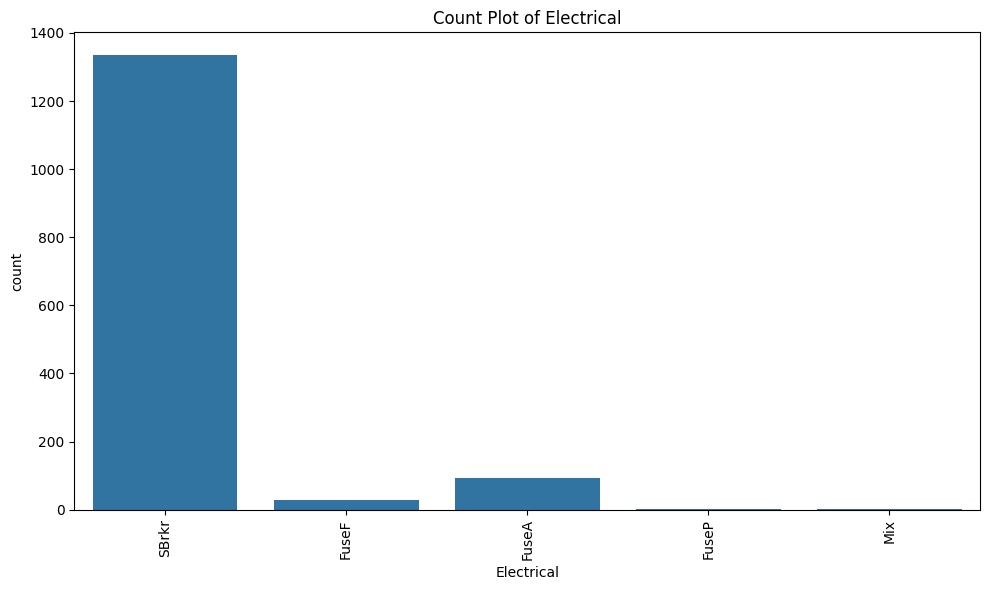

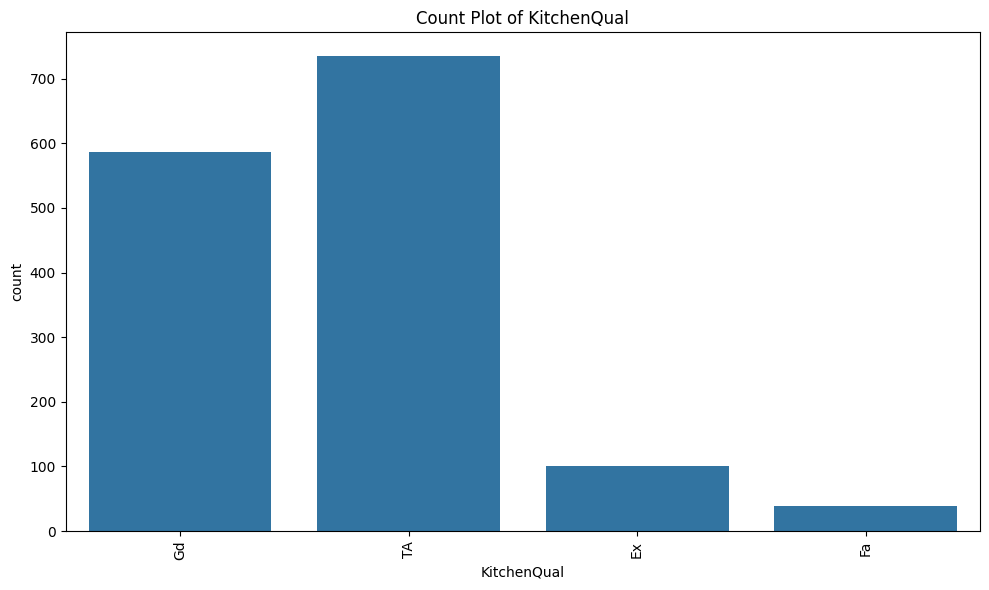

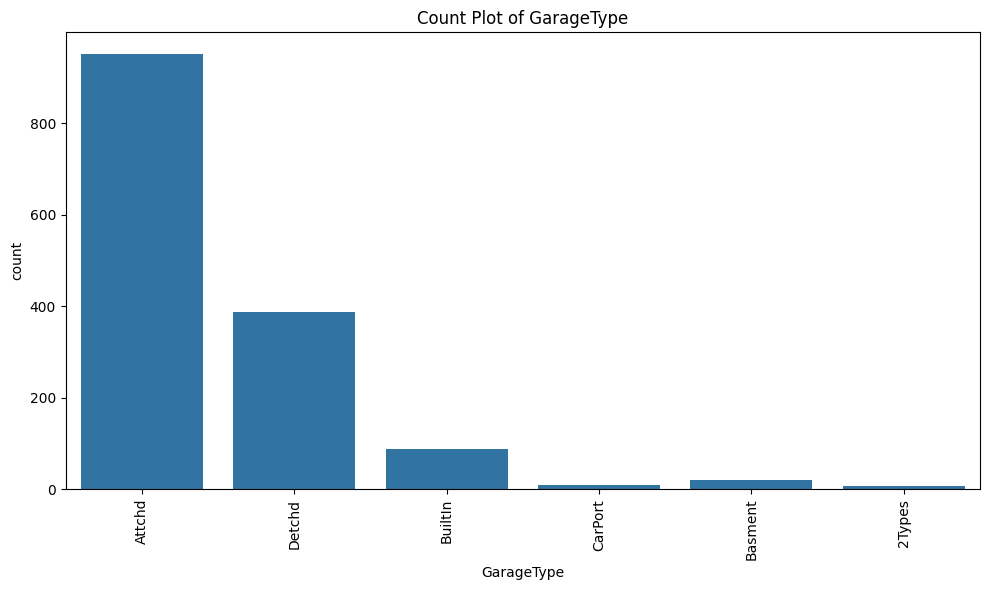

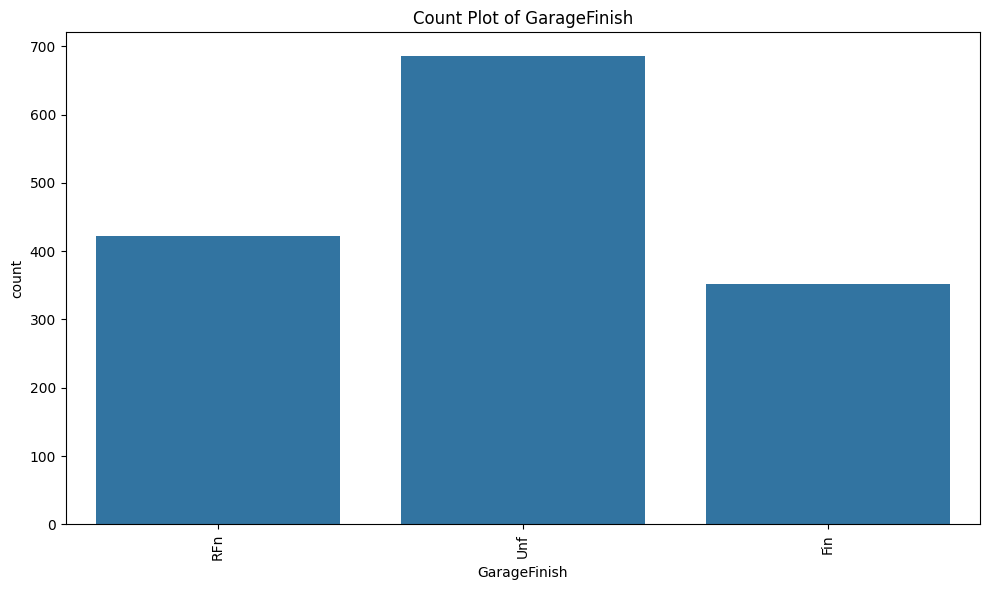

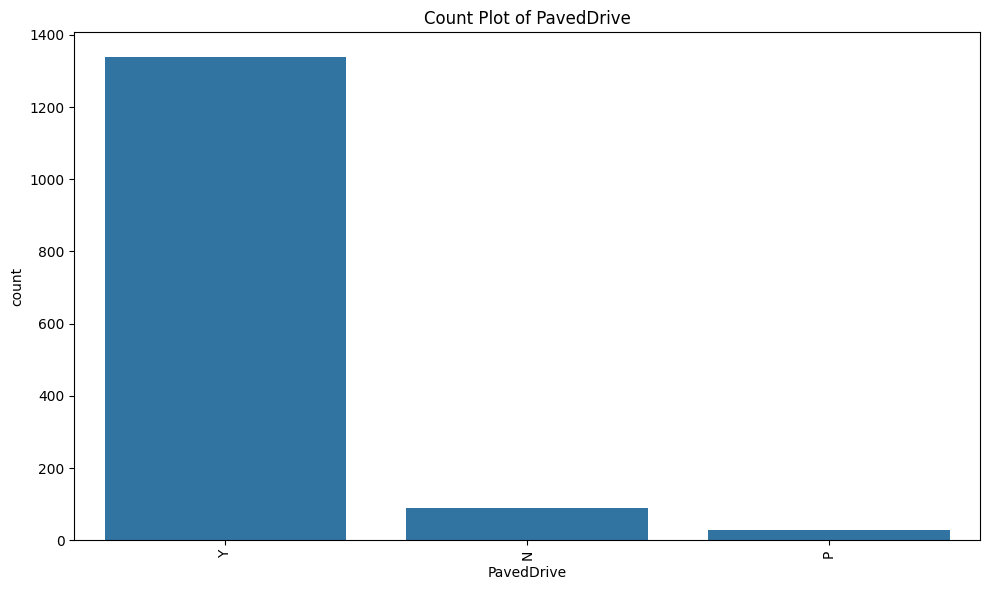

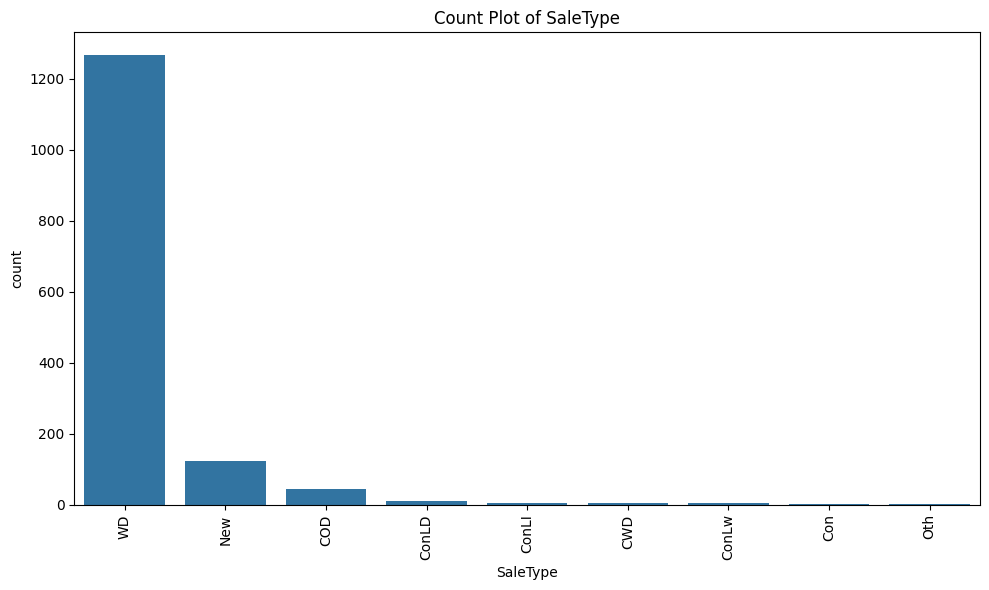

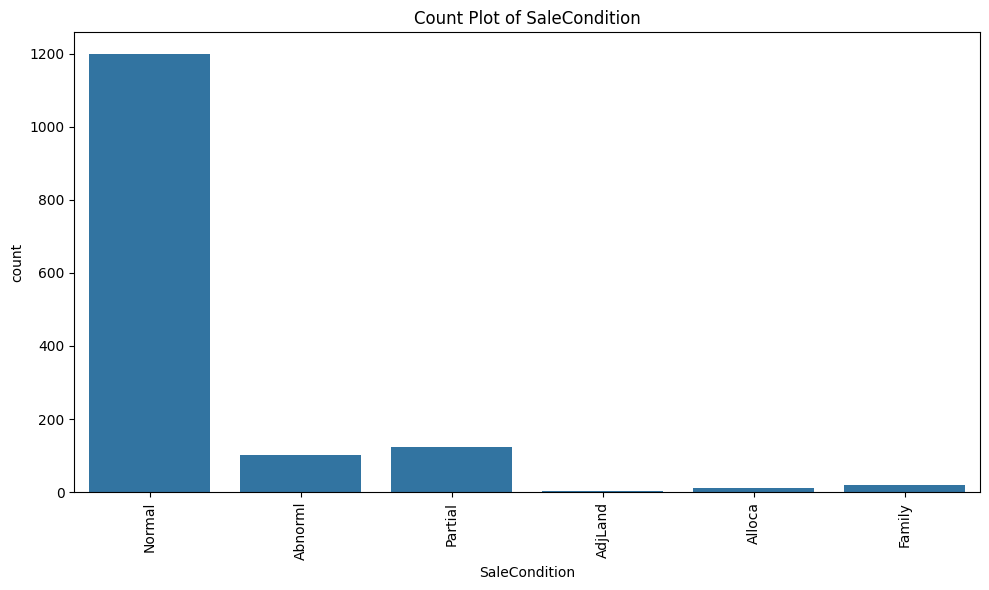

In [ ]:
categorical_columns=data.select_dtypes(include=['object','category']).columns
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=data)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

summary:
BsmtType2, Electrical, Saletype, SaleCondition, ExterCond

In [ ]:
# Function to group less frequent categories into an 'Other' class
def group_rare_categories(data, column, threshold=0.05, other_value='Other'):
    """
    Groups less frequent categories in a categorical column into an 'Other' class.

    Args:
        data (pd.DataFrame): The input DataFrame.
        column (str): The name of the column to transform.
        threshold (float): The proportion below which a category is considered rare.
                           Defaults to 0.05.
        other_value (str): The name for the new 'Other' class. Defaults to 'Other'.

    Returns:
        pd.DataFrame: The DataFrame with the transformed column.
    """
    # Calculate value counts and identify rare categories
    value_counts = data[column].value_counts(normalize=True)
    rare_categories = value_counts[value_counts < threshold].index

    # Replace rare categories with the 'Other' value
    data[column] = data[column].replace(rare_categories, other_value)

    return data

# Transform the specified columns by grouping rare categories
columns_to_transform = ['BsmtFinType2', 'Electrical', 'SaleType', 'SaleCondition', 'ExterCond']

# Apply the grouping function to each specified column
for col in columns_to_transform:
    data = group_rare_categories(data, col)

print("Data after grouping rare categories in specified columns:")
for col in columns_to_transform:
    print(f"\nValue counts for {col}:")
    print(data[col].value_counts())

Data after grouping rare categories in specified columns:

Value counts for BsmtFinType2:
BsmtFinType2
Unf      1294
Other     166
Name: count, dtype: int64

Value counts for Electrical:
Electrical
SBrkr    1335
FuseA      94
Other      31
Name: count, dtype: int64

Value counts for SaleType:
SaleType
WD       1267
New       122
Other      71
Name: count, dtype: int64

Value counts for SaleCondition:
SaleCondition
Normal     1198
Partial     125
Abnorml     101
Other        36
Name: count, dtype: int64

Value counts for ExterCond:
ExterCond
TA       1282
Gd        146
Other      32
Name: count, dtype: int64


In [ ]:
data.to_csv("preprocessed_train_data.csv")